# **1. Library**

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn import decomposition
import numpy as np
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product
import seaborn as sns
from collections import Counter
import plotly.express as px
from pivottablejs import pivot_ui
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap



import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# **Config**

In [2]:
#K-means Params
k_range = range(2, 20)

#DBSCAN Params
epsilon = np.linspace(0.1, 1.0, 10)
samples = range(2, 11)

# **2. Processing Clustering 50/50**

## **2.1 Clustering 2.1**

In [3]:
Data = pd.read_csv('Data21.csv')
Data

,content,sentiment
0,aplikasi manfaat lokasi driver online tsb,1
1,mahal saing selamat tinggal grab terima tani t...,-1
2,aplikasi anjing gua udh paketin tpi nemu drive...,-1
3,sistem aplikasi lot,-1
4,instal ulang akses lokasi gabisa yamalah ngula...,-1
...,...,...
145,klo update dpt driver,-1
146,aplikasi grab bantu banget rumah tangga repot ...,1
147,angel angel,-1
148,knpa hrus diupdate tros memori guw pnuhh,-1


In [4]:
Data = Data.dropna(subset=['content'])


counter = CountVectorizer()

X = counter.fit_transform(Data['content'])
vector = pd.DataFrame(X.toarray(), columns = counter.get_feature_names())
vector.set_index(Data.index,inplace =True)
    
vectorizer = TfidfTransformer()
Y = vectorizer.fit_transform(X)
df_tfidf = pd.DataFrame(Y.toarray(), columns = counter.get_feature_names())
df_tfidf.set_index(Data.index,inplace =True)
df_tfidf

,abis,admin,ae,aidzin,ajaa,aju,akses,akun,akurat,alamat,...,wkwk,xlipat,yahjd,yamalah,yaman,yeayy,yelah,yg,yl,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.560896,0.0,0.0,0.0,...,0.0,0.0,0.0,0.280448,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


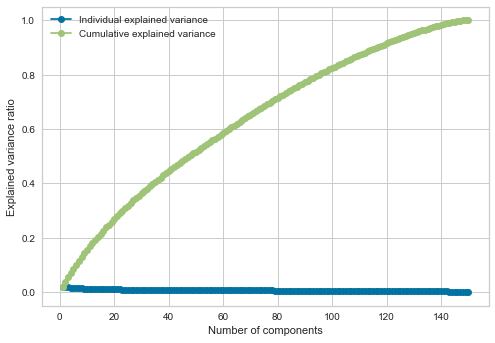

The optimal number of components is 130 with an explained variance ratio of 0.953.


In [5]:
pca = PCA()
pca.fit(df_tfidf)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.plot(range(1, len(var_exp)+1), var_exp, '-o', label='Individual explained variance')
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, '-o', label='Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

for n, exp_var in enumerate(cum_var_exp):
    if exp_var >= 0.95:
        print(f'The optimal number of components is {n+1} with an explained variance ratio of {exp_var:.3f}.')
        break
        
pca = PCA(n_components=n)
df_pca = pca.fit_transform(df_tfidf)

df_pca = pd.DataFrame(df_pca, columns=['PC{}'.format(i) for i in range(1, n+1)])

if 'target' in df_tfidf.columns:
        df_pca['target'] = df_tfidf['target']

In [6]:
df_21 = df_pca

**-----K-Means-------**

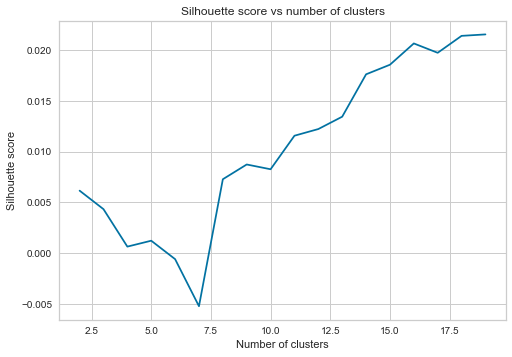

In [7]:
k_values = k_range

silhouette_scores = []
num_clusters = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_21)
    labels = kmeans.labels_
    
    score = silhouette_score(df_21, labels)
    silhouette_scores.append(score)
    num_clusters.append(k)

plt.plot(num_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs number of clusters')
plt.show()

best_k = num_clusters[np.argmax(silhouette_scores)]


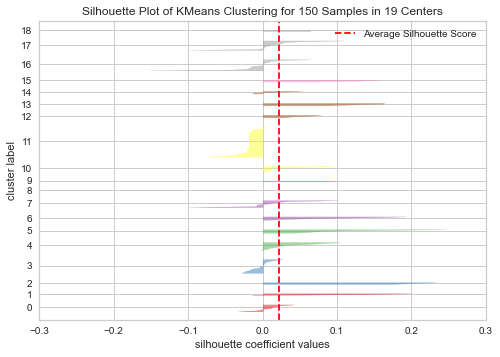

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 19 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [8]:
model = SilhouetteVisualizer(KMeans(best_k))
model.fit(df_21)
model.poof()  
model.show()

**----------DBSCAN----------**

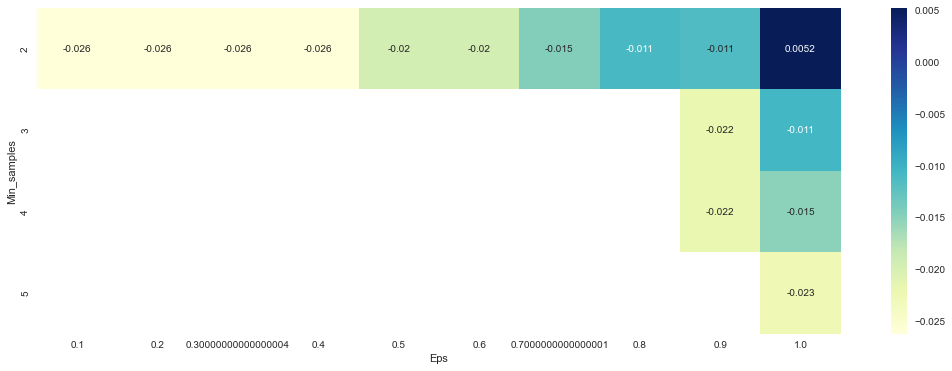

In [9]:
eps_values = epsilon
min_samples = samples

DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_21)
    unique_labels = np.unique(DBS_clustering.labels_)
    if len(unique_labels) > 1:  
        no_of_clusters.append(len(unique_labels))
        sil_score.append(silhouette_score(df_21, DBS_clustering.labels_))
    else:
        no_of_clusters.append(np.nan)  
        sil_score.append(np.nan)  

tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [10]:
tmp = tmp.sort_values(by = ['Sil_score'],ascending = False )
Eps = tmp['Eps'].iloc[0]
Min_samples = tmp['Min_samples'].iloc[0]

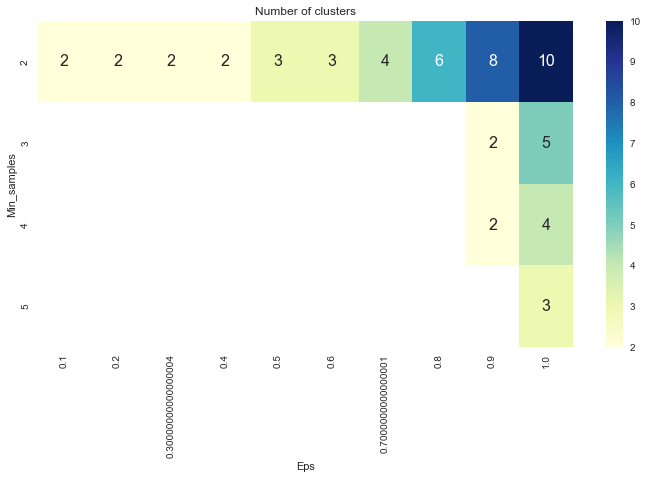

In [11]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

**--------Cluster K-Means ------------**

In [12]:
KM_clusters21 = KMeans(n_clusters=best_k, init='k-means++',random_state = 234).fit(df_21) # initialise and fit K-Means model

KM_clustered = Data.copy()
KM_clustered.loc[:,'cluster'] = KM_clusters21.labels_ 
KM_clustered = KM_clustered[['content','cluster']]
KM_clustered

,content,cluster
0,aplikasi manfaat lokasi driver online tsb,14
1,mahal saing selamat tinggal grab terima tani t...,10
2,aplikasi anjing gua udh paketin tpi nemu drive...,10
3,sistem aplikasi lot,4
4,instal ulang akses lokasi gabisa yamalah ngula...,2
...,...,...
145,klo update dpt driver,14
146,aplikasi grab bantu banget rumah tangga repot ...,13
147,angel angel,3
148,knpa hrus diupdate tros memori guw pnuhh,14


In [13]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

KM_clustered['most_common_word'] = KM_clustered['content'].apply(most_common_word)
most_common_df = KM_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(10)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
most_common_word_1,akun,allah,akses,best,sistem,mahal,log,daptar,eror,jelek,mahal,promonya,lh,antar,aplikasi,bintang,daerah,akun,pelit
most_common_word_2,NaN,mantap,kemudi,tingkat,lumayan,paham,susah,ribet,gajelas,bantu,aplikasi,update,blok,grab,titik,klo,puas,keren,promo
most_common_word_3,NaN,banget,aplikasi,bsa,kadang,rp,ulang,update,NaN,minum,kecewa,promonya,NaN,update,kemudi,tumpang,jarang,gmna,NaN
most_common_word_4,NaN,cepat,ampe,boleeeh,aplikasi,sellu,susah,ribet,NaN,knpa,kecewa,beli,NaN,drever,tips,bintang,pakai,tutup,NaN
most_common_word_5,NaN,NaN,login,bukaaplikasi,mudah,harga,aplikasi,bikin,NaN,aq,udahh,NaN,NaN,grab,tingkat,bintang,NaN,akun,NaN
most_common_word_6,NaN,NaN,gabisa,hang,keren,too,susah,mempermudagak,NaN,NaN,yaman,NaN,NaN,drivernya,kalo,NaN,NaN,NaN,NaN
most_common_word_7,NaN,NaN,gabisa,yeayy,aplikasi,layan,NaN,aplikasi,NaN,NaN,NaN,NaN,NaN,grab,driver,NaN,NaN,NaN,NaN
most_common_word_8,NaN,NaN,klo,keupdate,mantap,capek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,grab,mending,NaN,NaN,NaN,NaN
most_common_word_9,NaN,NaN,goblogg,manteb,aplikasi,harga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,grab,hidup,NaN,NaN,NaN,NaN


**----------Cluster DBSCAN------------**

In [14]:
DBS_clustering21 = DBSCAN(eps=Eps, min_samples=Min_samples).fit(df_21)

DBSCAN_clustered = Data.copy()
DBSCAN_clustered.loc[:,'cluster'] = DBS_clustering21.labels_
DBSCAN_clustered = DBSCAN_clustered[['content','cluster']]
DBSCAN_clustered

,content,cluster
0,aplikasi manfaat lokasi driver online tsb,-1
1,mahal saing selamat tinggal grab terima tani t...,-1
2,aplikasi anjing gua udh paketin tpi nemu drive...,-1
3,sistem aplikasi lot,-1
4,instal ulang akses lokasi gabisa yamalah ngula...,-1
...,...,...
145,klo update dpt driver,2
146,aplikasi grab bantu banget rumah tangga repot ...,-1
147,angel angel,-1
148,knpa hrus diupdate tros memori guw pnuhh,-1


In [15]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

DBSCAN_clustered['most_common_word'] = DBSCAN_clustered['content'].apply(most_common_word)
most_common_df = DBSCAN_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(11)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,-1,0,1,2,3,4,5,6,7,8
most_common_word_1,aplikasi,kemudi,jelek,lumayan,mudah,keren,login,miswan,mending,mantap
most_common_word_2,mahal,kemudi,bintang,kecewa,mantap,keren,gabisa,senang,hidup,banget
most_common_word_3,aplikasi,NaN,daptar,bantu,aplikasi,NaN,NaN,NaN,ramah,NaN
most_common_word_4,sistem,NaN,update,kecewa,bikin,NaN,NaN,NaN,NaN,NaN
most_common_word_5,akses,NaN,update,klo,mudah,NaN,NaN,NaN,NaN,NaN
most_common_word_6,best,NaN,tumpang,bantu,cepat,NaN,NaN,NaN,NaN,NaN
most_common_word_7,titik,NaN,bintang,lumayan,cepat,NaN,NaN,NaN,NaN,NaN
most_common_word_8,antar,NaN,aplikasi,beli,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_9,tingkat,NaN,NaN,klo,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_10,akun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**-----Comparing Performance------**

In [16]:
dbscan_silhouette_21 = silhouette_score(df_21, DBS_clustering21.labels_)
kmeans_silhouette_21 = silhouette_score(df_21, KM_clusters21.labels_)

print("DBSCAN Silhouette Score:", dbscan_silhouette_21)
print("K-Means Silhouette Score:", kmeans_silhouette_21)

DBSCAN Silhouette Score: 0.005237299217903707
K-Means Silhouette Score: 0.016909966484341524


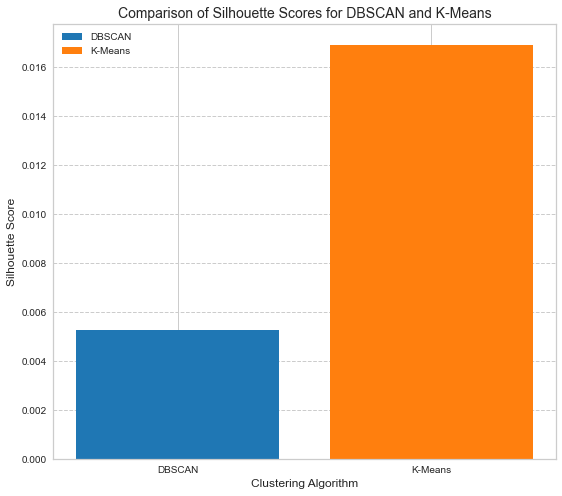

In [17]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.bar('DBSCAN', dbscan_silhouette_21, color='#1f77b4', label='DBSCAN')
ax.bar('K-Means', kmeans_silhouette_21, color='#ff7f0e', label='K-Means')

ax.set_xlabel('Clustering Algorithm', fontsize=12)
ax.set_ylabel('Silhouette Score', fontsize=12)
ax.set_title('Comparison of Silhouette Scores for DBSCAN and K-Means', fontsize=14)

ax.grid(axis='y', linestyle='--')


ax.legend(loc='upper left')

plt.show()

## **2.2 Clustering 2.2**

In [18]:
Data = pd.read_csv('Data22.csv')
Data

,content,sentiment
0,manfaat supaya lihat lokasi online tsb,1
1,mahal kalah saing selamat tinggal terima kasih...,-1
2,anjing gua udh paketin tpi nemu tpi promo ambi...,-1
3,sistem lot keluar sendiri,-1
4,baru instal ulang apk tapi pas minta akses lok...,-1
...,...,...
145,klo dpt jauh jauh,-1
146,yang ibu rumah tangga repot keluar rumah kalo ...,1
147,angel angel,-1
148,knpa sih hrus diupdate tros memori guw pnuhh,-1


In [19]:
Data = Data.dropna(subset=['content'])

counter = CountVectorizer()

X = counter.fit_transform(Data['content'])
vector = pd.DataFrame(X.toarray(), columns = counter.get_feature_names())
vector.set_index(Data.index,inplace =True)
    
vectorizer = TfidfTransformer()
Y = vectorizer.fit_transform(X)
df_tfidf = pd.DataFrame(Y.toarray(), columns = counter.get_feature_names())
df_tfidf.set_index(Data.index,inplace =True)
df_tfidf

,abis,adalah,admin,ae,agar,aidzin,ajaa,aju,akhir,akses,...,yaa,yah,yahjd,yamalah,yaman,yang,yeayy,yelah,yl,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.436586,...,0.0,0.0,0.0,0.218293,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.211441,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


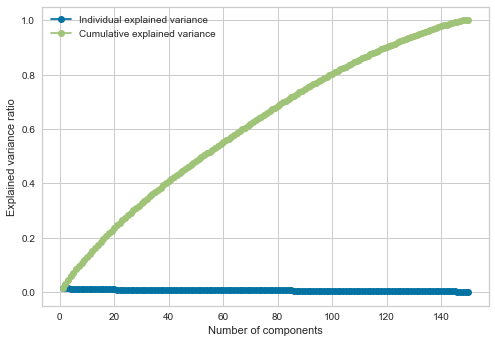

The optimal number of components is 132 with an explained variance ratio of 0.950.


In [20]:
pca = PCA()
pca.fit(df_tfidf)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.plot(range(1, len(var_exp)+1), var_exp, '-o', label='Individual explained variance')
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, '-o', label='Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

for n, exp_var in enumerate(cum_var_exp):
    if exp_var >= 0.95:
        print(f'The optimal number of components is {n+1} with an explained variance ratio of {exp_var:.3f}.')
        break
        
pca = PCA(n_components=n)
df_pca = pca.fit_transform(df_tfidf)

df_pca = pd.DataFrame(df_pca, columns=['PC{}'.format(i) for i in range(1, n+1)])

if 'target' in df_tfidf.columns:
    df_pca['target'] = df_tfidf['target']

In [21]:
df_22 = df_pca

**-----K-Means-------**

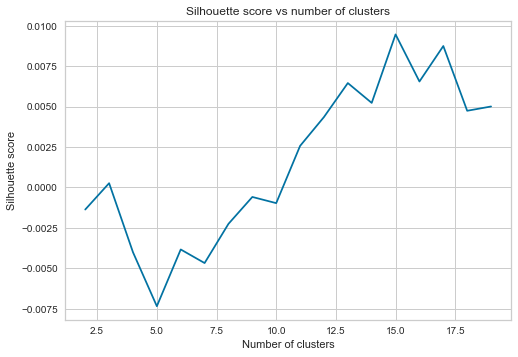

In [22]:
k_values = k_range

silhouette_scores = []
num_clusters = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_22)
    labels = kmeans.labels_
    
    score = silhouette_score(df_22, labels)
    silhouette_scores.append(score)
    num_clusters.append(k)

plt.plot(num_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs number of clusters')
plt.show()

best_k = num_clusters[np.argmax(silhouette_scores)]


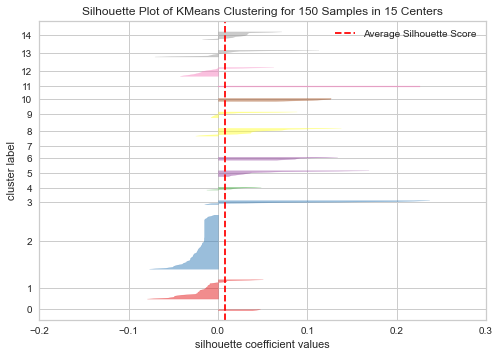

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 15 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
model = SilhouetteVisualizer(KMeans(best_k))
model.fit(df_22)
model.poof()  
model.show()

**----------DBSCAN----------**

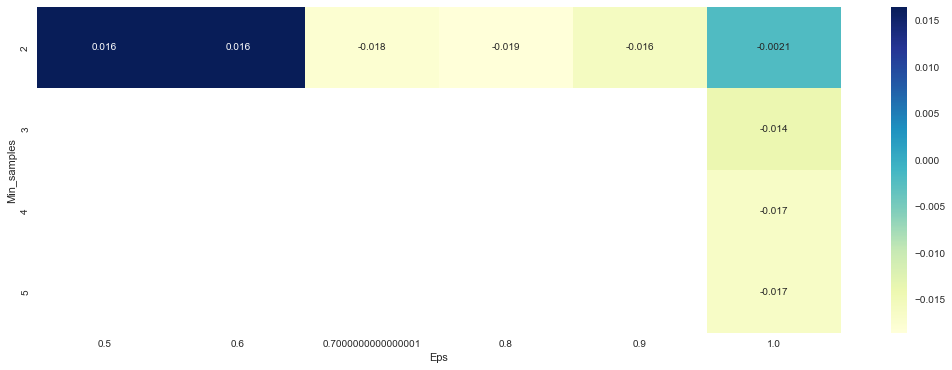

In [24]:
eps_values = epsilon
min_samples = samples

DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_22)
    unique_labels = np.unique(DBS_clustering.labels_)
    if len(unique_labels) > 1:  
        no_of_clusters.append(len(unique_labels))
        sil_score.append(silhouette_score(df_22, DBS_clustering.labels_))
    else:
        no_of_clusters.append(np.nan)  
        sil_score.append(np.nan)  

tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [25]:
tmp = tmp.sort_values(by = ['Sil_score'],ascending = False )
Eps = tmp['Eps'].iloc[0]
Min_samples = tmp['Min_samples'].iloc[0]

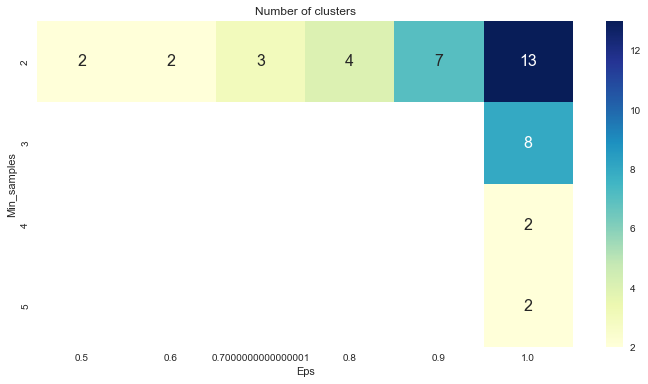

In [26]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

**--------Cluster K-Means ------------**

In [27]:
KM_clusters22 = KMeans(n_clusters=best_k, init='k-means++',random_state = 234).fit(df_22) # initialise and fit K-Means model

KM_clustered = Data.copy()
KM_clustered.loc[:,'cluster'] = KM_clusters22.labels_ 
KM_clustered = KM_clustered[['content','cluster']]
KM_clustered

,content,cluster
0,manfaat supaya lihat lokasi online tsb,11
1,mahal kalah saing selamat tinggal terima kasih...,4
2,anjing gua udh paketin tpi nemu tpi promo ambi...,11
3,sistem lot keluar sendiri,11
4,baru instal ulang apk tapi pas minta akses lok...,1
...,...,...
145,klo dpt jauh jauh,7
146,yang ibu rumah tangga repot keluar rumah kalo ...,0
147,angel angel,11
148,knpa sih hrus diupdate tros memori guw pnuhh,13


In [28]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

KM_clustered['most_common_word'] = KM_clustered['content'].apply(most_common_word)
most_common_df = KM_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(10)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
most_common_word_1,kendara,minta,jelek,kemudi,tahun,dapat,mahal,klo,mantap,mantap,log,manfaat,daptar,jelek,lumayan
most_common_word_2,rumah,bsa,capek,titik,antar,selalu,sellu,jlk,ok,mantap,susah,anjing,tetap,knpa,layan
most_common_word_3,NaN,keren,kalau,harus,lebih,NaN,harga,batu,ok,mantap,ulang,sistem,mempermudagak,goblogg,voucer
most_common_word_4,NaN,keren,mana,kadang,cepat,NaN,kasih,jangan,NaN,makin,lama,best,jelek,knpa,lumayan
most_common_word_5,NaN,sering,NaN,kontol,kasih,NaN,harga,klo,NaN,jadi,susah,akun,NaN,NaN,blok
most_common_word_6,NaN,tips,NaN,kalo,cepat,NaN,NaN,jauh,NaN,diskon,apa,food,NaN,NaN,beli
most_common_word_7,NaN,baru,NaN,rp,NaN,NaN,NaN,NaN,NaN,sekarang,susah,allah,NaN,NaN,NaN
most_common_word_8,NaN,suka,NaN,gmna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,kalo,NaN,NaN,NaN
most_common_word_9,NaN,sering,NaN,ampe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amat,NaN,NaN,NaN


**----------Cluster DBSCAN------------**

In [29]:
DBS_clustering22 = DBSCAN(eps=Eps, min_samples=Min_samples).fit(df_22)

DBSCAN_clustered = Data.copy()
DBSCAN_clustered.loc[:,'cluster'] = DBS_clustering22.labels_
DBSCAN_clustered = DBSCAN_clustered[['content','cluster']]
DBSCAN_clustered

,content,cluster
0,manfaat supaya lihat lokasi online tsb,-1
1,mahal kalah saing selamat tinggal terima kasih...,-1
2,anjing gua udh paketin tpi nemu tpi promo ambi...,-1
3,sistem lot keluar sendiri,-1
4,baru instal ulang apk tapi pas minta akses lok...,-1
...,...,...
145,klo dpt jauh jauh,-1
146,yang ibu rumah tangga repot keluar rumah kalo ...,-1
147,angel angel,-1
148,knpa sih hrus diupdate tros memori guw pnuhh,-1


In [30]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

DBSCAN_clustered['most_common_word'] = DBSCAN_clustered['content'].apply(most_common_word)
most_common_df = DBSCAN_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(11)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,-1,0
most_common_word_1,manfaat,mantap
most_common_word_2,tahun,ok
most_common_word_3,anjing,NaN
most_common_word_4,sistem,NaN
most_common_word_5,minta,NaN
most_common_word_6,best,NaN
most_common_word_7,kemudi,NaN
most_common_word_8,titik,NaN
most_common_word_9,antar,NaN
most_common_word_10,jelek,NaN


**-----Comparing Performance------**

In [31]:
dbscan_silhouette_22 = silhouette_score(df_22, DBS_clustering22.labels_)
kmeans_silhouette_22 = silhouette_score(df_22, KM_clusters22.labels_)

print("DBSCAN Silhouette Score:", dbscan_silhouette_22)
print("K-Means Silhouette Score:", kmeans_silhouette_22)

DBSCAN Silhouette Score: 0.016465001932732107
K-Means Silhouette Score: 0.004337295237608363


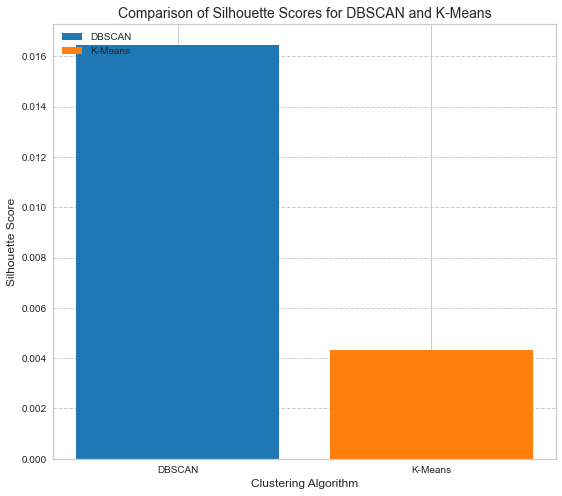

In [32]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.bar('DBSCAN', dbscan_silhouette_22, color='#1f77b4', label='DBSCAN')
ax.bar('K-Means', kmeans_silhouette_22, color='#ff7f0e', label='K-Means')

ax.set_xlabel('Clustering Algorithm', fontsize=12)
ax.set_ylabel('Silhouette Score', fontsize=12)
ax.set_title('Comparison of Silhouette Scores for DBSCAN and K-Means', fontsize=14)

ax.grid(axis='y', linestyle='--')


ax.legend(loc='upper left')

plt.show()

## **2.3 Clustering 2.3**

In [33]:
Data = pd.read_csv('Data23.csv')
Data

,content,sentiment
0,aplikasi manfaat lokasi driver online tsb,1
1,mahal saing selamat tinggal grab terima emani ...,-1
2,aplikasi anjing gua udh paketin tpi ne driver ...,-1
3,sistem aplikasi lemot,-1
4,instal ulang akses lokasi gabisa yama ngulang ...,-1
...,...,...
145,klo update dpt driver,-1
146,aplikasi grab bantu banget rumah tangga repot ...,1
147,angel angel,-1
148,knpa hrus update tros memori guw pnuhh,-1


In [34]:
Data = Data.dropna(subset=['content'])

counter = CountVectorizer()

X = counter.fit_transform(Data['content'])
vector = pd.DataFrame(X.toarray(), columns = counter.get_feature_names())
vector.set_index(Data.index,inplace =True)
    
vectorizer = TfidfTransformer()
Y = vectorizer.fit_transform(X)
df_tfidf = pd.DataFrame(Y.toarray(), columns = counter.get_feature_names())
df_tfidf.set_index(Data.index,inplace =True)
df_tfidf

,abis,admin,ae,aidzin,ajaa,aju,akses,akun,akurat,alamat,...,wkwk,xlipat,yahjd,yam,yama,ye,yeayy,yg,yl,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.566344,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.283172,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


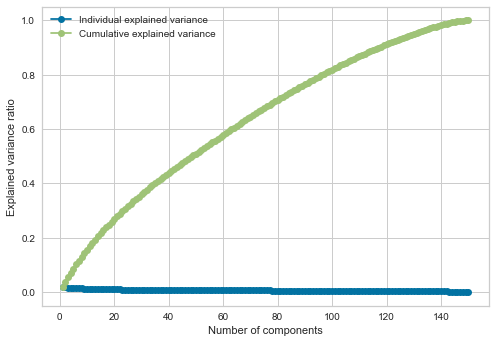

The optimal number of components is 130 with an explained variance ratio of 0.950.


In [35]:
pca = PCA()
pca.fit(df_tfidf)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.plot(range(1, len(var_exp)+1), var_exp, '-o', label='Individual explained variance')
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, '-o', label='Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

for n, exp_var in enumerate(cum_var_exp):
    if exp_var >= 0.95:
        print(f'The optimal number of components is {n+1} with an explained variance ratio of {exp_var:.3f}.')
        break
        
pca = PCA(n_components=n)
df_pca = pca.fit_transform(df_tfidf)

df_pca = pd.DataFrame(df_pca, columns=['PC{}'.format(i) for i in range(1, n+1)])

if 'target' in df_tfidf.columns:
    df_pca['target'] = df_tfidf['target']

In [36]:
df_23 = df_pca

**-----K-Means-------**

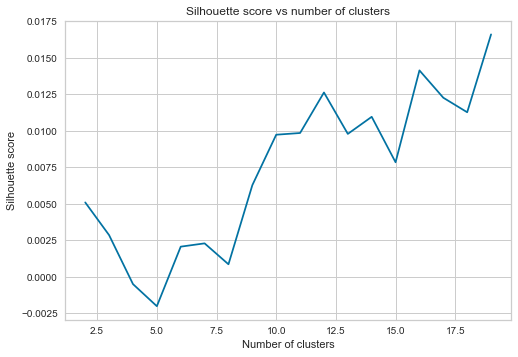

In [37]:
k_values = k_range

silhouette_scores = []
num_clusters = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_23)
    labels = kmeans.labels_
    
    score = silhouette_score(df_23, labels)
    silhouette_scores.append(score)
    num_clusters.append(k)

plt.plot(num_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs number of clusters')
plt.show()

best_k = num_clusters[np.argmax(silhouette_scores)]


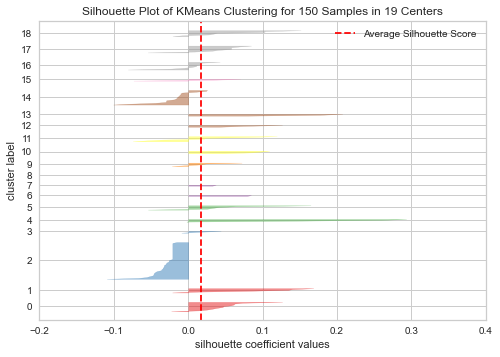

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 19 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [38]:
model = SilhouetteVisualizer(KMeans(best_k))
model.fit(df_23)
model.poof()  
model.show()

**----------DBSCAN----------**

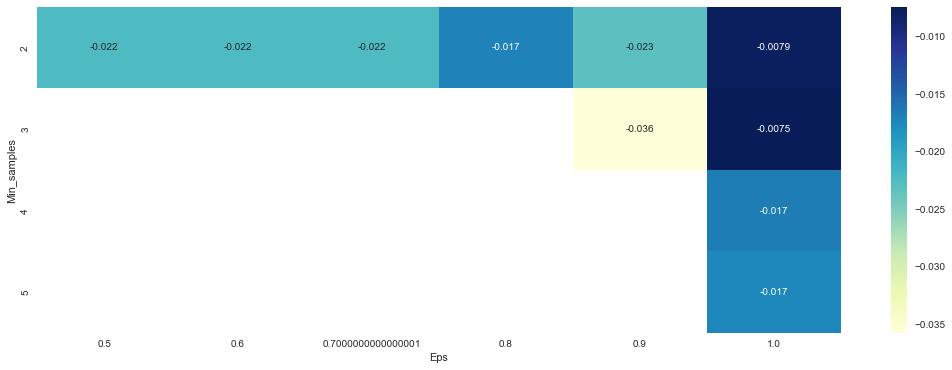

In [39]:
eps_values = epsilon
min_samples = samples

DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_23)
    unique_labels = np.unique(DBS_clustering.labels_)
    if len(unique_labels) > 1:  
        no_of_clusters.append(len(unique_labels))
        sil_score.append(silhouette_score(df_23, DBS_clustering.labels_))
    else:
        no_of_clusters.append(np.nan)  
        sil_score.append(np.nan)  

tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [40]:
tmp = tmp.sort_values(by = ['Sil_score'],ascending = False )
Eps = tmp['Eps'].iloc[0]
Min_samples = tmp['Min_samples'].iloc[0]

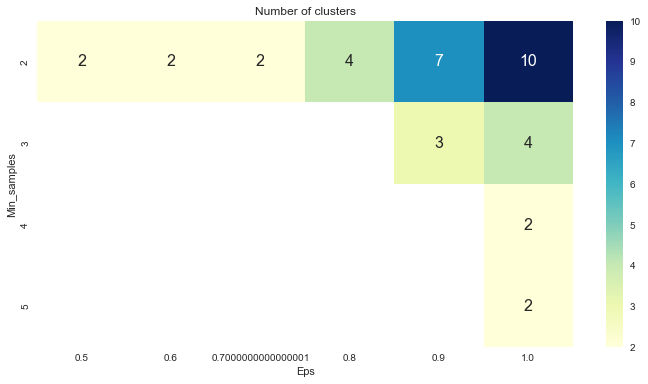

In [41]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

**--------Cluster K-Means ------------**

In [42]:
KM_clusters23 = KMeans(n_clusters=best_k, init='k-means++',random_state = 234).fit(df_23) # initialise and fit K-Means model

KM_clustered = Data.copy()
KM_clustered.loc[:,'cluster'] = KM_clusters23.labels_ 
KM_clustered = KM_clustered[['content','cluster']]
KM_clustered

,content,cluster
0,aplikasi manfaat lokasi driver online tsb,17
1,mahal saing selamat tinggal grab terima emani ...,2
2,aplikasi anjing gua udh paketin tpi ne driver ...,17
3,sistem aplikasi lemot,9
4,instal ulang akses lokasi gabisa yama ngulang ...,8
...,...,...
145,klo update dpt driver,10
146,aplikasi grab bantu banget rumah tangga repot ...,2
147,angel angel,10
148,knpa hrus update tros memori guw pnuhh,10


In [43]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

KM_clustered['most_common_word'] = KM_clustered['content'].apply(most_common_word)
most_common_df = KM_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(10)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
most_common_word_1,akun,gmna,mahal,aplikasi,emudi,daptar,akun,mending,akses,sistem,st,pelit,jelek,aplikasi,lh,kecewa,daerah,aplikasi,hang
most_common_word_2,akun,gajelas,antar,aplikasi,titik,ribet,keren,hidup,update,mahal,tingkat,promo,log,ampe,blok,bantu,tertib,aplikasi,NaN
most_common_word_3,jarang,aplikasi,grab,rp,emudi,diskon,keren,ramah,update,lumayan,udah,promo,allah,login,promo,yg,NaN,bintang,NaN
most_common_word_4,NaN,NaN,paham,harga,sukses,bikin,NaN,NaN,ribet,kadang,boleeeh,promo,minum,gabisa,NaN,layan,NaN,klo,NaN
most_common_word_5,NaN,NaN,drever,tutup,saldo,rmudagak,NaN,NaN,NaN,bsa,bukaaplikasi,NaN,knpa,gabisa,NaN,cepat,NaN,mantap,NaN
most_common_word_6,NaN,NaN,pakek,NaN,emudi,aplikasi,NaN,NaN,NaN,bantu,sellu,NaN,banget,goblogg,NaN,lumayan,NaN,susah,NaN
most_common_word_7,NaN,NaN,grab,NaN,potong,NaN,NaN,NaN,NaN,mantap,yeayy,NaN,susah,NaN,NaN,NaN,NaN,suka,NaN
most_common_word_8,NaN,NaN,grab,NaN,NaN,NaN,NaN,NaN,NaN,aplikasi,tips,NaN,cepat,NaN,NaN,NaN,NaN,umpang,NaN
most_common_word_9,NaN,NaN,grab,NaN,NaN,NaN,NaN,NaN,NaN,aplikasi,update,NaN,aq,NaN,NaN,NaN,NaN,ulang,NaN


**----------Cluster DBSCAN------------**

In [44]:
DBS_clustering23 = DBSCAN(eps=Eps, min_samples=Min_samples).fit(df_23)

DBSCAN_clustered = Data.copy()
DBSCAN_clustered.loc[:,'cluster'] = DBS_clustering23.labels_
DBSCAN_clustered = DBSCAN_clustered[['content','cluster']]
DBSCAN_clustered

,content,cluster
0,aplikasi manfaat lokasi driver online tsb,-1
1,mahal saing selamat tinggal grab terima emani ...,-1
2,aplikasi anjing gua udh paketin tpi ne driver ...,-1
3,sistem aplikasi lemot,-1
4,instal ulang akses lokasi gabisa yama ngulang ...,-1
...,...,...
145,klo update dpt driver,1
146,aplikasi grab bantu banget rumah tangga repot ...,-1
147,angel angel,-1
148,knpa hrus update tros memori guw pnuhh,-1


In [45]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

DBSCAN_clustered['most_common_word'] = DBSCAN_clustered['content'].apply(most_common_word)
most_common_df = DBSCAN_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(11)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,-1,0,1,2
most_common_word_1,aplikasi,emudi,jelek,mending
most_common_word_2,mahal,emudi,bintang,hidup
most_common_word_3,aplikasi,emudi,lumayan,ramah
most_common_word_4,sistem,NaN,kecewa,NaN
most_common_word_5,akses,NaN,daptar,NaN
most_common_word_6,st,NaN,update,NaN
most_common_word_7,titik,NaN,update,NaN
most_common_word_8,antar,NaN,bantu,NaN
most_common_word_9,tingkat,NaN,klo,NaN
most_common_word_10,akun,NaN,umpang,NaN


**-----Comparing Performance------**

In [46]:
dbscan_silhouette_23 = silhouette_score(df_23, DBS_clustering23.labels_)
kmeans_silhouette_23 = silhouette_score(df_23, KM_clusters23.labels_)

print("DBSCAN Silhouette Score:", dbscan_silhouette_23)
print("K-Means Silhouette Score:", kmeans_silhouette_23)

DBSCAN Silhouette Score: -0.007467234168230028
K-Means Silhouette Score: 0.012690004724709826


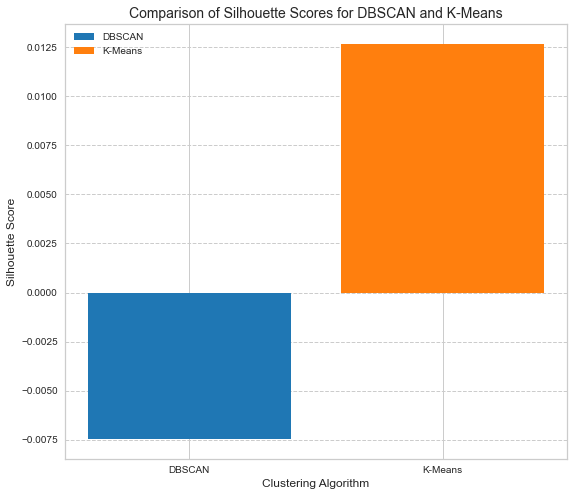

In [47]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.bar('DBSCAN', dbscan_silhouette_23, color='#1f77b4', label='DBSCAN')
ax.bar('K-Means', kmeans_silhouette_23, color='#ff7f0e', label='K-Means')

ax.set_xlabel('Clustering Algorithm', fontsize=12)
ax.set_ylabel('Silhouette Score', fontsize=12)
ax.set_title('Comparison of Silhouette Scores for DBSCAN and K-Means', fontsize=14)

ax.grid(axis='y', linestyle='--')


ax.legend(loc='upper left')

plt.show()

## **2.4 Clustering 2.4**

In [48]:
Data = pd.read_csv('Data24.csv')
Data

,content,sentiment
0,manfaat supaya lihat lokasi online tsb,1
1,mahal kalah saing selamat tinggal terima kasih...,-1
2,anjing gua udh paketin tpi ne tpi promo ambil ...,-1
3,sistem lemot keluar sendiri,-1
4,baru instal ulang apk tapi pas minta akses lok...,-1
...,...,...
145,klo dpt jauh jauh,-1
146,yang ibu rumah tangga repot keluar rumah kalo ...,1
147,angel angel,-1
148,knpa sih hrus update tros memori guw pnuhh,-1


In [49]:
Data = Data.dropna(subset=['content'])

counter = CountVectorizer()

X = counter.fit_transform(Data['content'])
vector = pd.DataFrame(X.toarray(), columns = counter.get_feature_names())
vector.set_index(Data.index,inplace =True)
    
vectorizer = TfidfTransformer()
Y = vectorizer.fit_transform(X)
df_tfidf = pd.DataFrame(Y.toarray(), columns = counter.get_feature_names())
df_tfidf.set_index(Data.index,inplace =True)
df_tfidf

,abis,adalah,admin,ae,agar,aidzin,ajaa,aju,akhir,akses,...,yaa,yah,yahjd,yam,yama,yang,ye,yeayy,yl,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.43914,...,0.0,0.0,0.0,0.0,0.21957,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.00000,0.209638,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0


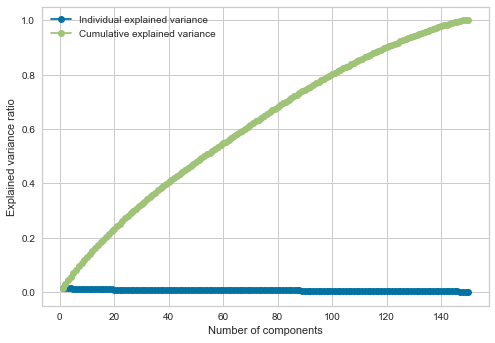

The optimal number of components is 132 with an explained variance ratio of 0.950.


In [50]:
pca = PCA()
pca.fit(df_tfidf)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.plot(range(1, len(var_exp)+1), var_exp, '-o', label='Individual explained variance')
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, '-o', label='Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

for n, exp_var in enumerate(cum_var_exp):
    if exp_var >= 0.95:
        print(f'The optimal number of components is {n+1} with an explained variance ratio of {exp_var:.3f}.')
        break
        
pca = PCA(n_components=n)
df_pca = pca.fit_transform(df_tfidf)

df_pca = pd.DataFrame(df_pca, columns=['PC{}'.format(i) for i in range(1, n+1)])

if 'target' in df_tfidf.columns:
    df_pca['target'] = df_tfidf['target']

In [51]:
df_24=df_pca

**-----K-Means-------**

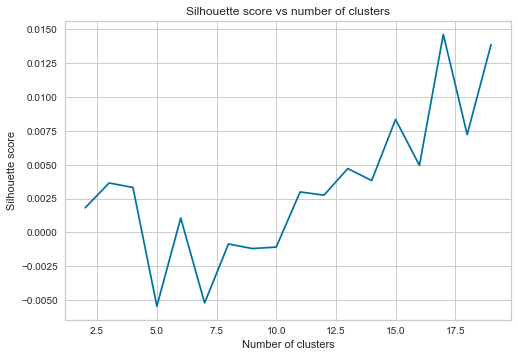

In [52]:
k_values = k_range

silhouette_scores = []
num_clusters = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_24)
    labels = kmeans.labels_
    
    score = silhouette_score(df_24, labels)
    silhouette_scores.append(score)
    num_clusters.append(k)

plt.plot(num_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs number of clusters')
plt.show()

best_k = num_clusters[np.argmax(silhouette_scores)]


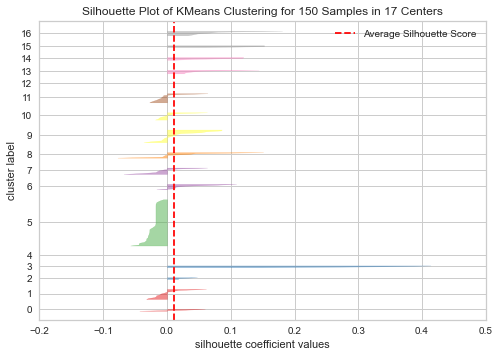

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 17 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
model = SilhouetteVisualizer(KMeans(best_k))
model.fit(df_24)
model.poof()  
model.show()

**----------DBSCAN----------**

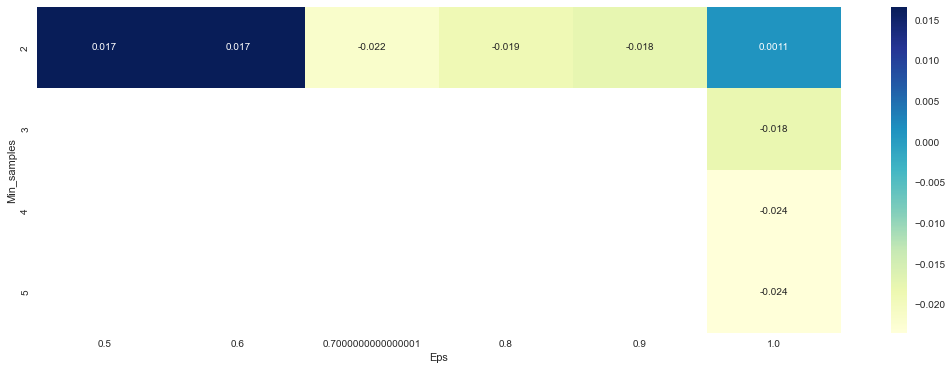

In [54]:
eps_values = epsilon
min_samples = samples

DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_24)
    unique_labels = np.unique(DBS_clustering.labels_)
    if len(unique_labels) > 1:  
        no_of_clusters.append(len(unique_labels))
        sil_score.append(silhouette_score(df_24, DBS_clustering.labels_))
    else:
        no_of_clusters.append(np.nan)  
        sil_score.append(np.nan)  

tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [55]:
tmp = tmp.sort_values(by = ['Sil_score'],ascending = False )
Eps = tmp['Eps'].iloc[0]
Min_samples = tmp['Min_samples'].iloc[0]

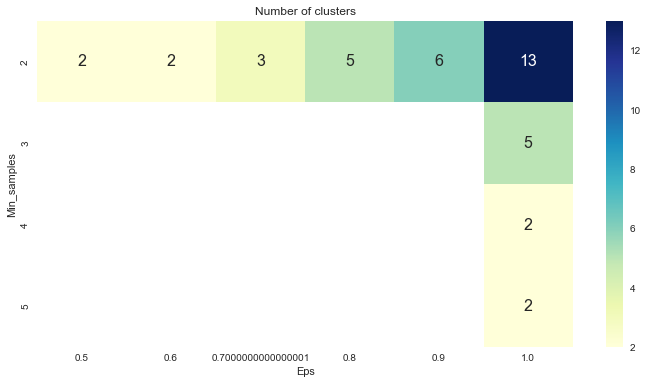

In [56]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

**--------Cluster K-Means ------------**

In [57]:
KM_clusters24 = KMeans(n_clusters=best_k, init='k-means++',random_state = 234).fit(df_24) # initialise and fit K-Means model

KM_clustered = Data.copy()
KM_clustered.loc[:,'cluster'] = KM_clusters24.labels_ 
KM_clustered = KM_clustered[['content','cluster']]
KM_clustered

,content,cluster
0,manfaat supaya lihat lokasi online tsb,7
1,mahal kalah saing selamat tinggal terima kasih...,13
2,anjing gua udh paketin tpi ne tpi promo ambil ...,13
3,sistem lemot keluar sendiri,12
4,baru instal ulang apk tapi pas minta akses lok...,7
...,...,...
145,klo dpt jauh jauh,13
146,yang ibu rumah tangga repot keluar rumah kalo ...,12
147,angel angel,13
148,knpa sih hrus update tros memori guw pnuhh,1


In [58]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

KM_clustered['most_common_word'] = KM_clustered['content'].apply(most_common_word)
most_common_df = KM_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(10)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
most_common_word_1,kontol,apa,emudi,daptar,batu,titik,ayan,manfaat,lumayan,bagi,sukses,kurang,sistem,tahun,mantap,gmna,rp
most_common_word_2,NaN,kasih,antar,ribet,NaN,jelek,klo,minta,mantap,kenapa,capek,masa,harus,anjing,mantap,login,makin
most_common_word_3,NaN,aku,akun,jelek,NaN,jelek,voucer,kalo,jadi,jarang,semoga,coba,kalo,st,mantap,gabisa,banyak
most_common_word_4,NaN,kantor,mahal,NaN,NaN,log,lumayan,dapat,lama,NaN,NaN,sya,baru,food,ok,akun,promo
most_common_word_5,NaN,knpa,bsa,NaN,NaN,knpa,NaN,majus,kalau,NaN,NaN,NaN,ampe,allah,ok,goblogg,blok
most_common_word_6,NaN,NaN,keren,NaN,NaN,NaN,NaN,guna,beli,NaN,NaN,NaN,harga,kadang,NaN,NaN,promo
most_common_word_7,NaN,NaN,keren,NaN,NaN,NaN,NaN,ulang,NaN,NaN,NaN,NaN,mending,amat,NaN,NaN,NaN
most_common_word_8,NaN,NaN,selalu,NaN,NaN,NaN,NaN,diskon,NaN,NaN,NaN,NaN,gabisa,udah,NaN,NaN,NaN
most_common_word_9,NaN,NaN,sering,NaN,NaN,NaN,NaN,tau,NaN,NaN,NaN,NaN,tutup,boleeeh,NaN,NaN,NaN


**----------Cluster DBSCAN------------**

In [59]:
DBS_clustering24 = DBSCAN(eps=Eps, min_samples=Min_samples).fit(df_24)

DBSCAN_clustered = Data.copy()
DBSCAN_clustered.loc[:,'cluster'] = DBS_clustering24.labels_
DBSCAN_clustered = DBSCAN_clustered[['content','cluster']]
DBSCAN_clustered

,content,cluster
0,manfaat supaya lihat lokasi online tsb,-1
1,mahal kalah saing selamat tinggal terima kasih...,-1
2,anjing gua udh paketin tpi ne tpi promo ambil ...,-1
3,sistem lemot keluar sendiri,-1
4,baru instal ulang apk tapi pas minta akses lok...,-1
...,...,...
145,klo dpt jauh jauh,-1
146,yang ibu rumah tangga repot keluar rumah kalo ...,-1
147,angel angel,-1
148,knpa sih hrus update tros memori guw pnuhh,-1


In [60]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

DBSCAN_clustered['most_common_word'] = DBSCAN_clustered['content'].apply(most_common_word)
most_common_df = DBSCAN_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(11)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,-1,0
most_common_word_1,manfaat,mantap
most_common_word_2,tahun,ok
most_common_word_3,anjing,NaN
most_common_word_4,sistem,NaN
most_common_word_5,minta,NaN
most_common_word_6,st,NaN
most_common_word_7,emudi,NaN
most_common_word_8,titik,NaN
most_common_word_9,antar,NaN
most_common_word_10,jelek,NaN


**-----Comparing Performance------**

In [61]:
dbscan_silhouette_24 = silhouette_score(df_24, DBS_clustering24.labels_)
kmeans_silhouette_24 = silhouette_score(df_24, KM_clusters24.labels_)

print("DBSCAN Silhouette Score:", dbscan_silhouette_24)
print("K-Means Silhouette Score:", kmeans_silhouette_24)

DBSCAN Silhouette Score: 0.016602069247193298
K-Means Silhouette Score: -0.005954023940185027


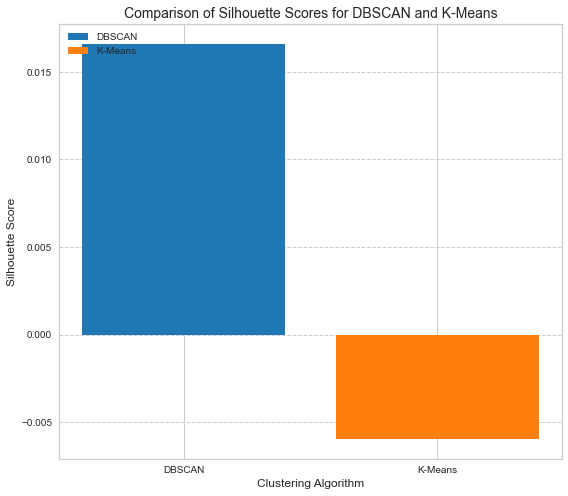

In [62]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.bar('DBSCAN', dbscan_silhouette_24, color='#1f77b4', label='DBSCAN')
ax.bar('K-Means', kmeans_silhouette_24, color='#ff7f0e', label='K-Means')

ax.set_xlabel('Clustering Algorithm', fontsize=12)
ax.set_ylabel('Silhouette Score', fontsize=12)
ax.set_title('Comparison of Silhouette Scores for DBSCAN and K-Means', fontsize=14)

ax.grid(axis='y', linestyle='--')


ax.legend(loc='upper left')

plt.show()

# **3. Processing Clusterin 70/30**

## **3.1 Clustering 3.1**

In [63]:
Data = pd.read_csv('Data31.csv')
Data

,content,sentiment
0,mahal promo promo mahal promo tarif mahal,-1
1,turun,1
2,akun tangguh gapernah bikin order fiktif siste...,-1
3,suka layan,1
4,mobil avanza bisnis,1
...,...,...
145,promo driver sibuk,-1
146,oke,1
147,promo diskon the best,1
148,sngat menbantu tpi gc normal harga slalu ubah ...,1


In [64]:
Data = Data.dropna(subset=['content'])

counter = CountVectorizer()

X = counter.fit_transform(Data['content'])
vector = pd.DataFrame(X.toarray(), columns = counter.get_feature_names())
vector.set_index(Data.index,inplace =True)
    
vectorizer = TfidfTransformer()
Y = vectorizer.fit_transform(X)
df_tfidf = pd.DataFrame(Y.toarray(), columns = counter.get_feature_names())
df_tfidf.set_index(Data.index,inplace =True)
df_tfidf

,aaplikasi,adminknp,aktifitas,aktivitas,akun,alam,alfamart,alhamdulillah,allah,amsyong,...,untung,update,updatenya,verifikasi,verivikasi,vermuk,weeeewww,yaman,yess,yg
0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.28865,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


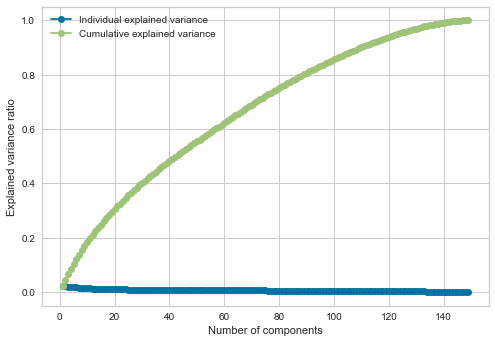

The optimal number of components is 124 with an explained variance ratio of 0.952.


In [65]:
pca = PCA()
pca.fit(df_tfidf)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.plot(range(1, len(var_exp)+1), var_exp, '-o', label='Individual explained variance')
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, '-o', label='Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

for n, exp_var in enumerate(cum_var_exp):
    if exp_var >= 0.95:
        print(f'The optimal number of components is {n+1} with an explained variance ratio of {exp_var:.3f}.')
        break
        
pca = PCA(n_components=n)
df_pca = pca.fit_transform(df_tfidf)

df_pca = pd.DataFrame(df_pca, columns=['PC{}'.format(i) for i in range(1, n+1)])

if 'target' in df_tfidf.columns:
    df_pca['target'] = df_tfidf['target']

In [66]:
df_31 = df_pca

**-----K-Means-------**

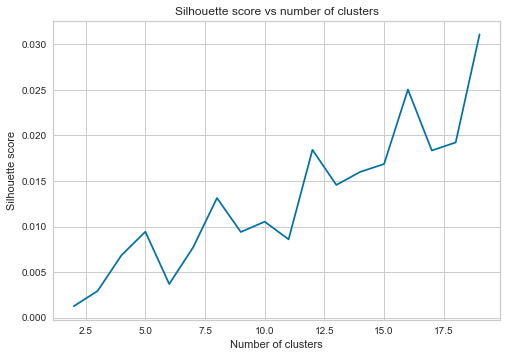

In [67]:
k_values = k_range

silhouette_scores = []
num_clusters = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_31)
    labels = kmeans.labels_
    
    score = silhouette_score(df_pca, labels)
    silhouette_scores.append(score)
    num_clusters.append(k)

plt.plot(num_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs number of clusters')
plt.show()

best_k = num_clusters[np.argmax(silhouette_scores)]


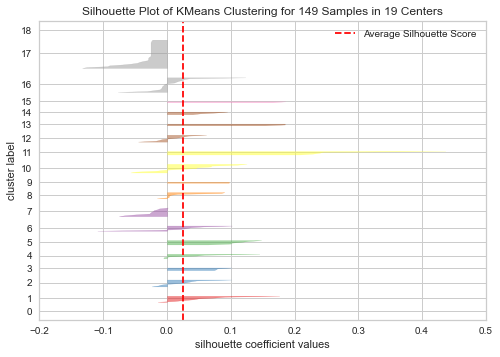

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 149 Samples in 19 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [68]:
model = SilhouetteVisualizer(KMeans(best_k))
model.fit(df_31)
model.poof()  
model.show()

**----------DBSCAN----------**

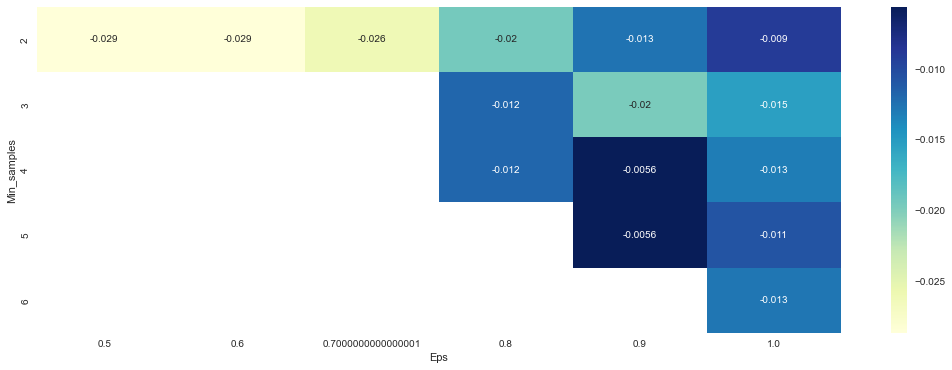

In [69]:
eps_values = epsilon
min_samples = samples

DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_31)
    unique_labels = np.unique(DBS_clustering.labels_)
    if len(unique_labels) > 1:  
        no_of_clusters.append(len(unique_labels))
        sil_score.append(silhouette_score(df_31, DBS_clustering.labels_))
    else:
        no_of_clusters.append(np.nan)  
        sil_score.append(np.nan)  

tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [70]:
tmp = tmp.sort_values(by = ['Sil_score'],ascending = False )
Eps = tmp['Eps'].iloc[0]
Min_samples = tmp['Min_samples'].iloc[0]

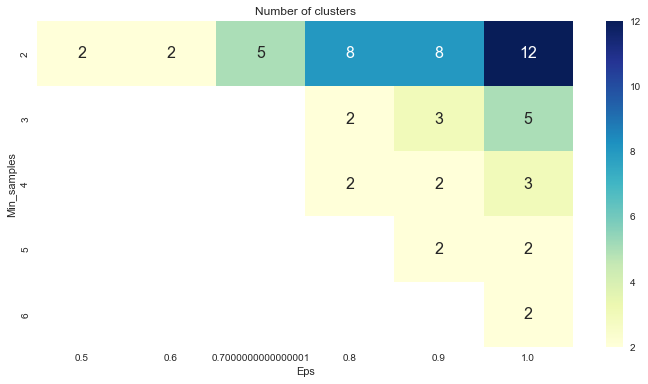

In [71]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

**--------Cluster K-Means ------------**

In [72]:
KM_clusters31 = KMeans(n_clusters=best_k, init='k-means++',random_state = 234).fit(df_31) # initialise and fit K-Means model

KM_clustered = Data.copy()
KM_clustered.loc[:,'cluster'] = KM_clusters31.labels_ 
KM_clustered = KM_clustered[['content','cluster']]
KM_clustered

,content,cluster
0,mahal promo promo mahal promo tarif mahal,5
1,turun,7
2,akun tangguh gapernah bikin order fiktif siste...,2
3,suka layan,0
4,mobil avanza bisnis,7
...,...,...
145,promo driver sibuk,14
146,oke,7
147,promo diskon the best,5
148,sngat menbantu tpi gc normal harga slalu ubah ...,11


In [73]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

KM_clustered['most_common_word'] = KM_clustered['content'].apply(most_common_word)
most_common_df = KM_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(10)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
most_common_word_1,suka,pake,akun,alhamdulillah,terimakasih,mahal,grabperjalanan,turun,suka,download,gua,bantu,mantap,banget,driver,bismillahirrahmanirrahim,trimakasi,cepat,kode
most_common_word_2,grab,kode,selesai,grab,aplikasi,tarif,nyaman,mobil,lg,canada,gua,good,tingkat,selamat,batal,moga,NaN,pesan,aplikasi
most_common_word_3,baharu,kalo,aplikasi,gabisa,mantap,the,jalan,sempurna,NaN,memori,NaN,dpet,aplikasi,layan,driver,oke,NaN,mudah,NaN
most_common_word_4,layan,akun,assalamualaikum,tip,layan,grab,grab,amsyong,NaN,NaN,NaN,yg,drever,apikasi,driver,suka,NaN,cepat,NaN
most_common_word_5,suka,apknya,jelek,ksih,mudah,promo,mud,aplikasi,NaN,NaN,NaN,kampret,ramah,jengkel,promo,moga,NaN,parah,NaN
most_common_word_6,puas,akun,bgs,grab,NaN,NaN,NaN,oke,NaN,NaN,NaN,good,drivernya,NaN,kode,yess,NaN,cepat,NaN
most_common_word_7,suka,NaN,bagus,alhamdulillah,NaN,NaN,NaN,app,NaN,NaN,NaN,grab,bagus,NaN,drivernya,like,NaN,NaN,NaN
most_common_word_8,suka,NaN,aplikasi,NaN,NaN,NaN,NaN,bantu,NaN,NaN,NaN,update,mudah,NaN,promo,NaN,NaN,NaN,NaN
most_common_word_9,NaN,NaN,padalhan,NaN,NaN,NaN,NaN,simple,NaN,NaN,NaN,app,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**----------Cluster DBSCAN------------**

In [74]:
DBS_clustering31 = DBSCAN(eps=Eps, min_samples=Min_samples).fit(df_31)

DBSCAN_clustered = Data.copy()
DBSCAN_clustered.loc[:,'cluster'] = DBS_clustering31.labels_
DBSCAN_clustered = DBSCAN_clustered[['content','cluster']]
DBSCAN_clustered

,content,cluster
0,mahal promo promo mahal promo tarif mahal,-1
1,turun,-1
2,akun tangguh gapernah bikin order fiktif siste...,-1
3,suka layan,-1
4,mobil avanza bisnis,-1
...,...,...
145,promo driver sibuk,-1
146,oke,0
147,promo diskon the best,-1
148,sngat menbantu tpi gc normal harga slalu ubah ...,-1


In [75]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

DBSCAN_clustered['most_common_word'] = DBSCAN_clustered['content'].apply(most_common_word)
most_common_df = DBSCAN_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(11)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,-1,0
most_common_word_1,mahal,oke
most_common_word_2,turun,app
most_common_word_3,akun,layan
most_common_word_4,suka,oke
most_common_word_5,mobil,oke
most_common_word_6,bantu,NaN
most_common_word_7,alhamdulillah,NaN
most_common_word_8,sempurna,NaN
most_common_word_9,grab,NaN
most_common_word_10,mantap,NaN


**-----Comparing Performance------**

In [76]:
dbscan_silhouette_31 = silhouette_score(df_31, DBS_clustering31.labels_)
kmeans_silhouette_31 = silhouette_score(df_31, KM_clusters31.labels_)

print("DBSCAN Silhouette Score:", dbscan_silhouette_31)
print("K-Means Silhouette Score:", kmeans_silhouette_31)

DBSCAN Silhouette Score: -0.005600832481091924
K-Means Silhouette Score: 0.019710125853561286


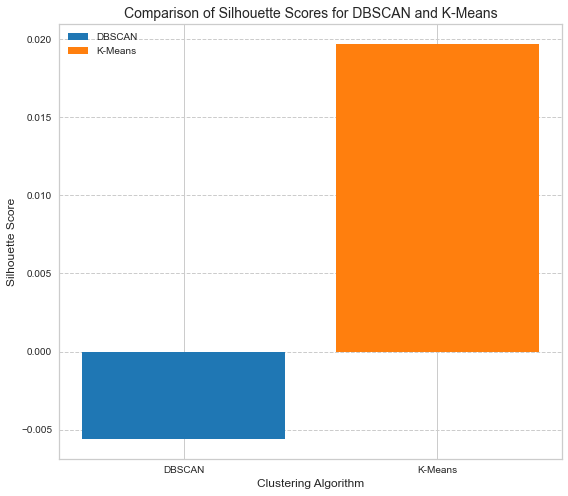

In [77]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.bar('DBSCAN', dbscan_silhouette_31, color='#1f77b4', label='DBSCAN')
ax.bar('K-Means', kmeans_silhouette_31, color='#ff7f0e', label='K-Means')

ax.set_xlabel('Clustering Algorithm', fontsize=12)
ax.set_ylabel('Silhouette Score', fontsize=12)
ax.set_title('Comparison of Silhouette Scores for DBSCAN and K-Means', fontsize=14)

ax.grid(axis='y', linestyle='--')


ax.legend(loc='upper left')

plt.show()

## **3.2 Clustering 3.2**

In [78]:
Data = pd.read_csv('Data32.csv')
Data

,content,sentiment
0,tambah sini tambah mahal promo percuma aja dul...,-1
1,agak turun,1
2,akun tiba tangguh padahal gapernah bikin order...,-1
3,suka layan,1
4,mobil avanza bisnis,1
...,...,...
145,promo guna sibuk terus,-1
146,oke,1
147,banyak promo diskon the best,1
148,sngat menbantu tpi ko gc normal harga slalu ub...,1


In [79]:
Data = Data.dropna(subset=['content'])

counter = CountVectorizer()

X = counter.fit_transform(Data['content'])
vector = pd.DataFrame(X.toarray(), columns = counter.get_feature_names())
vector.set_index(Data.index,inplace =True)
    
vectorizer = TfidfTransformer()
Y = vectorizer.fit_transform(X)
df_tfidf = pd.DataFrame(Y.toarray(), columns = counter.get_feature_names())
df_tfidf.set_index(Data.index,inplace =True)
df_tfidf

,aaplikasi,ada,adminknp,aduh,agak,aj,aja,akhir,aktifitas,aktivitas,...,utk,verifikasi,verivikasi,vermuk,waktu,weeeewww,yaa,yaman,yang,yess
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.309131,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.637711,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


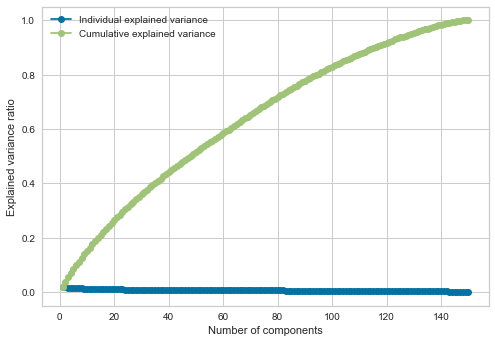

The optimal number of components is 129 with an explained variance ratio of 0.951.


In [80]:
pca = PCA()
pca.fit(df_tfidf)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.plot(range(1, len(var_exp)+1), var_exp, '-o', label='Individual explained variance')
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, '-o', label='Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

for n, exp_var in enumerate(cum_var_exp):
    if exp_var >= 0.95:
        print(f'The optimal number of components is {n+1} with an explained variance ratio of {exp_var:.3f}.')
        break
        
pca = PCA(n_components=n)
df_pca = pca.fit_transform(df_tfidf)

df_pca = pd.DataFrame(df_pca, columns=['PC{}'.format(i) for i in range(1, n+1)])

if 'target' in df_tfidf.columns:
    df_pca['target'] = df_tfidf['target']

In [81]:
df_32 = df_pca

**-----K-Means-------**

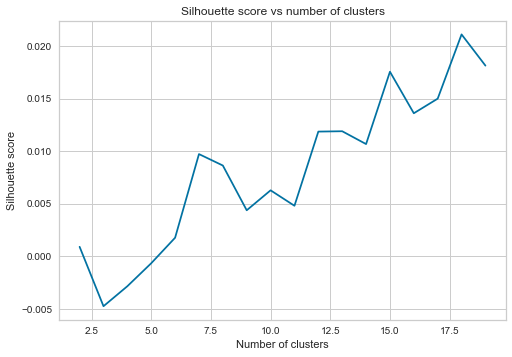

In [82]:
k_values = k_range

silhouette_scores = []
num_clusters = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_32)
    labels = kmeans.labels_
    
    score = silhouette_score(df_32, labels)
    silhouette_scores.append(score)
    num_clusters.append(k)

plt.plot(num_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs number of clusters')
plt.show()

best_k = num_clusters[np.argmax(silhouette_scores)]


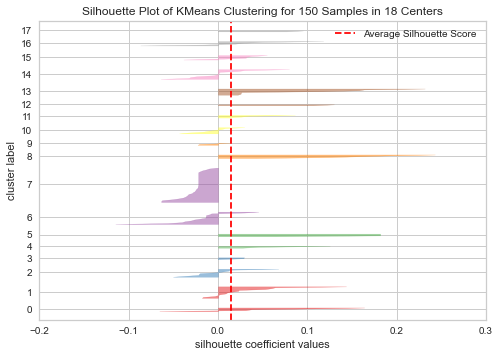

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 18 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [83]:
model = SilhouetteVisualizer(KMeans(best_k))
model.fit(df_32)
model.poof()  
model.show()

**----------DBSCAN----------**

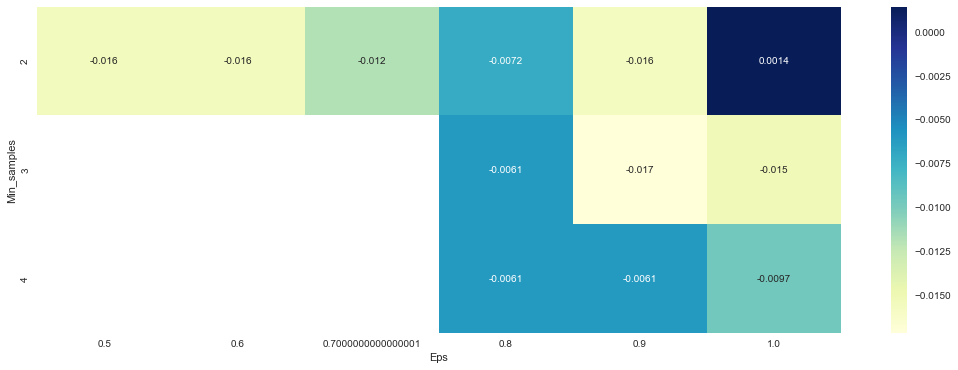

In [84]:
eps_values = epsilon
min_samples = samples

DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_32)
    unique_labels = np.unique(DBS_clustering.labels_)
    if len(unique_labels) > 1:  
        no_of_clusters.append(len(unique_labels))
        sil_score.append(silhouette_score(df_32, DBS_clustering.labels_))
    else:
        no_of_clusters.append(np.nan)  
        sil_score.append(np.nan)  

tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [85]:
tmp = tmp.sort_values(by = ['Sil_score'],ascending = False )
Eps = tmp['Eps'].iloc[0]
Min_samples = tmp['Min_samples'].iloc[0]

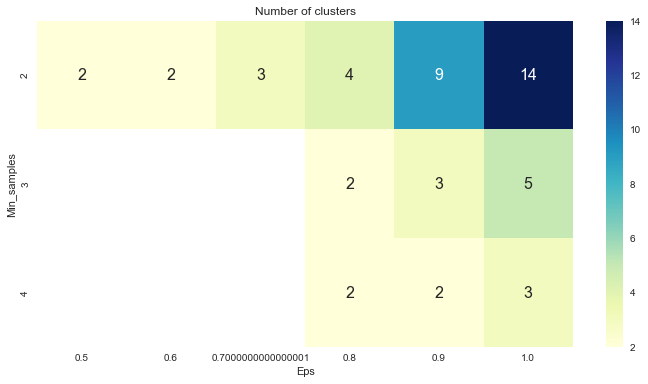

In [86]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

**--------Cluster K-Means ------------**

In [87]:
KM_clusters32 = KMeans(n_clusters=best_k, init='k-means++',random_state = 234).fit(df_32) # initialise and fit K-Means model

KM_clustered = Data.copy()
KM_clustered.loc[:,'cluster'] = KM_clusters32.labels_ 
KM_clustered = KM_clustered[['content','cluster']]
KM_clustered

,content,cluster
0,tambah sini tambah mahal promo percuma aja dul...,4
1,agak turun,4
2,akun tiba tangguh padahal gapernah bikin order...,4
3,suka layan,14
4,mobil avanza bisnis,4
...,...,...
145,promo guna sibuk terus,4
146,oke,0
147,banyak promo diskon the best,5
148,sngat menbantu tpi ko gc normal harga slalu ub...,4


In [88]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

KM_clustered['most_common_word'] = KM_clustered['content'].apply(most_common_word)
most_common_df = KM_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(10)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
most_common_word_1,oke,guna,bismillahirrahmanirrahim,pake,mahal,the,cepat,sempurna,udah,dengan,bagus,dapat,tambah,makas,suka,good,good,luar
most_common_word_2,app,canada,baharu,lemotsering,agak,banyak,kampret,mantap,gua,nyaman,order,terimakasih,lg,drever,alhamdulillah,update,good,untuk
most_common_word_3,kenapa,milik,buat,kok,akun,NaN,assalamualaikum,memprmudah,lanjut,mud,iya,rasa,NaN,NaN,bagusgrab,gomawo,good,kalau
most_common_word_4,selamat,NaN,sahabat,bgs,mobil,NaN,batal,moga,gua,NaN,memori,puas,NaN,NaN,suka,alhamdulillah,NaN,promo
most_common_word_5,layan,NaN,bagus,kenapa,ketika,NaN,pernah,mudah,NaN,NaN,bagus,NaN,NaN,NaN,juga,gk,NaN,untuk
most_common_word_6,oke,NaN,drivernya,tarif,amsyong,NaN,cari,yang,NaN,NaN,NaN,NaN,NaN,NaN,bagus,bs,NaN,drivernya
most_common_word_7,apikasi,NaN,suka,order,dpet,NaN,cepat,mantap,NaN,NaN,NaN,NaN,NaN,NaN,tolong,NaN,NaN,NaN
most_common_word_8,jengkel,NaN,like,kenapa,selesai,NaN,parah,mudah,NaN,NaN,NaN,NaN,NaN,NaN,layan,NaN,NaN,NaN
most_common_word_9,oke,NaN,NaN,akun,tingkat,NaN,cepat,layan,NaN,NaN,NaN,NaN,NaN,NaN,suka,NaN,NaN,NaN


**----------Cluster DBSCAN------------**

In [89]:
DBS_clustering32 = DBSCAN(eps=Eps, min_samples=Min_samples).fit(df_32)

DBSCAN_clustered = Data.copy()
DBSCAN_clustered.loc[:,'cluster'] = DBS_clustering32.labels_
DBSCAN_clustered = DBSCAN_clustered[['content','cluster']]
DBSCAN_clustered

,content,cluster
0,tambah sini tambah mahal promo percuma aja dul...,-1
1,agak turun,-1
2,akun tiba tangguh padahal gapernah bikin order...,-1
3,suka layan,0
4,mobil avanza bisnis,-1
...,...,...
145,promo guna sibuk terus,3
146,oke,1
147,banyak promo diskon the best,11
148,sngat menbantu tpi ko gc normal harga slalu ub...,-1


In [90]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

DBSCAN_clustered['most_common_word'] = DBSCAN_clustered['content'].apply(most_common_word)
most_common_df = DBSCAN_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(11)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,-1,0,1,2,3,4,5,6,7,8,9,10,11,12
most_common_word_1,mahal,suka,oke,tingkat,guna,terimakasih,suka,udah,makin,puas,drivernya,order,the,yang
most_common_word_2,agak,bagusgrab,layan,mudah,promo,rasa,tambah,gua,makin,cukup,mudah,bagus,banyak,layan
most_common_word_3,akun,bagus,oke,tingkat,NaN,NaN,NaN,NaN,NaN,NaN,mudah,NaN,NaN,NaN
most_common_word_4,mobil,NaN,oke,bagus,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_5,ketika,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_6,alhamdulillah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_7,sempurna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_8,mantap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_9,dengan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_10,good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**-----Comparing Performance------**

In [91]:
dbscan_silhouette_32 = silhouette_score(df_32, DBS_clustering32.labels_)
kmeans_silhouette_32 = silhouette_score(df_32, KM_clusters32.labels_)

print("DBSCAN Silhouette Score:", dbscan_silhouette_32)
print("K-Means Silhouette Score:", kmeans_silhouette_32)

DBSCAN Silhouette Score: 0.0014200707346928125
K-Means Silhouette Score: 0.011998352265220344


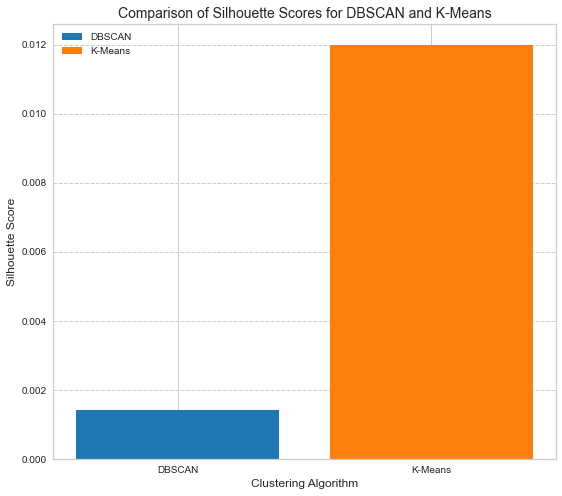

In [92]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.bar('DBSCAN', dbscan_silhouette_32, color='#1f77b4', label='DBSCAN')
ax.bar('K-Means', kmeans_silhouette_32, color='#ff7f0e', label='K-Means')

ax.set_xlabel('Clustering Algorithm', fontsize=12)
ax.set_ylabel('Silhouette Score', fontsize=12)
ax.set_title('Comparison of Silhouette Scores for DBSCAN and K-Means', fontsize=14)

ax.grid(axis='y', linestyle='--')


ax.legend(loc='upper left')

plt.show()

## **3.3 Clustering 3.3**

In [93]:
Data = pd.read_csv('Data33.csv')
Data

,content,sentiment
0,mahal promo promo semahal promo tarif mahal,-1
1,urun,1
2,akun tangguh gapernah bikin order fiktif siste...,-1
3,suka ay,1
4,mobil avanza bisnis,1
...,...,...
145,promo driver sibuk,-1
146,oke,1
147,promo diskon the st,1
148,sngat bantu tpi gc normal harga slalu ubah ubah,1


In [94]:
Data = Data.dropna(subset=['content'])


counter = CountVectorizer()

X = counter.fit_transform(Data['content'])
vector = pd.DataFrame(X.toarray(), columns = counter.get_feature_names())
vector.set_index(Data.index,inplace =True)
    
vectorizer = TfidfTransformer()
Y = vectorizer.fit_transform(X)
df_tfidf = pd.DataFrame(Y.toarray(), columns = counter.get_feature_names())
df_tfidf.set_index(Data.index,inplace =True)
df_tfidf

,aaplikasi,adminknp,aktifitas,aktivitas,akun,alam,alfamart,alhamdulillah,allah,amsyong,...,update,upgrade,urun,verifikasi,verivikasi,vermuk,weeeewww,yam,yess,yg
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.288768,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


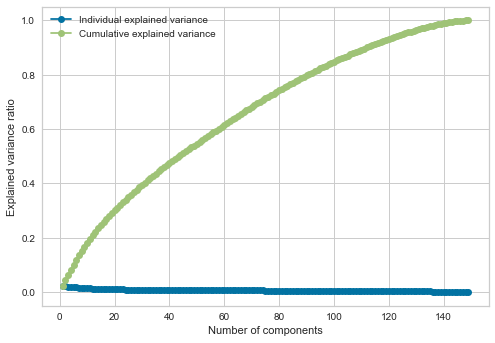

The optimal number of components is 126 with an explained variance ratio of 0.952.


In [95]:
pca = PCA()
pca.fit(df_tfidf)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.plot(range(1, len(var_exp)+1), var_exp, '-o', label='Individual explained variance')
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, '-o', label='Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

for n, exp_var in enumerate(cum_var_exp):
    if exp_var >= 0.95:
        print(f'The optimal number of components is {n+1} with an explained variance ratio of {exp_var:.3f}.')
        break
        
pca = PCA(n_components=n)
df_pca = pca.fit_transform(df_tfidf)

df_pca = pd.DataFrame(df_pca, columns=['PC{}'.format(i) for i in range(1, n+1)])

if 'target' in df_tfidf.columns:
    df_pca['target'] = df_tfidf['target']

In [96]:
df_33 = df_pca

**-----K-Means-------**

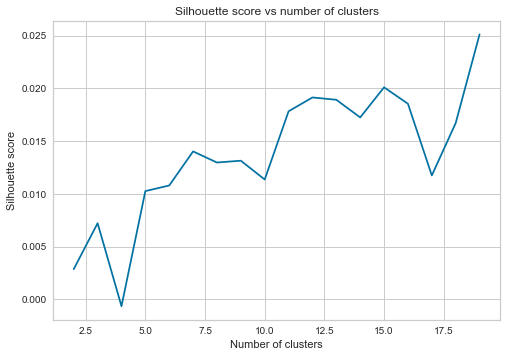

In [97]:
k_values = k_range

silhouette_scores = []
num_clusters = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_33)
    labels = kmeans.labels_
    
    score = silhouette_score(df_33, labels)
    silhouette_scores.append(score)
    num_clusters.append(k)

plt.plot(num_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs number of clusters')
plt.show()

best_k = num_clusters[np.argmax(silhouette_scores)]


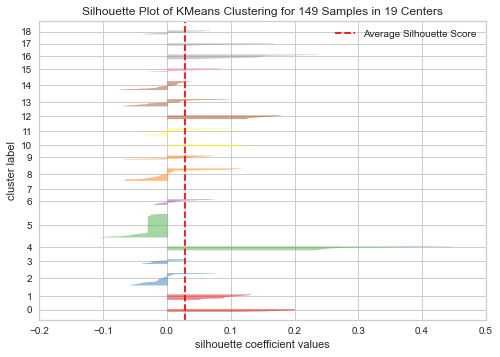

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 149 Samples in 19 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [98]:
model = SilhouetteVisualizer(KMeans(best_k))
model.fit(df_33)
model.poof()  
model.show()

**----------DBSCAN----------**

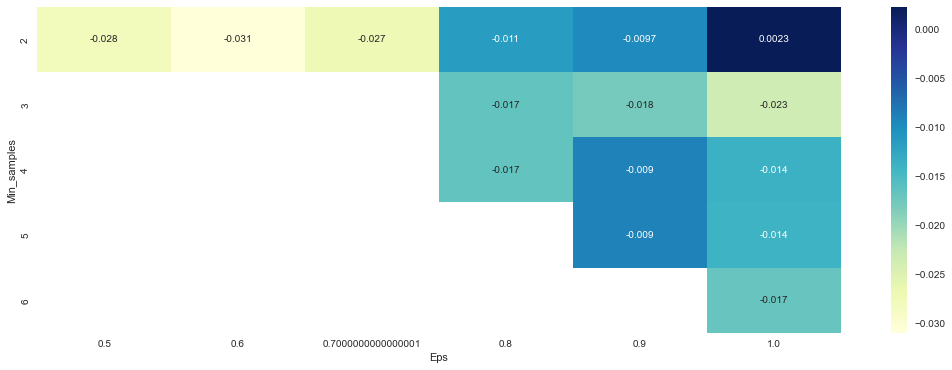

In [99]:
eps_values = epsilon
min_samples = samples

DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_33)
    unique_labels = np.unique(DBS_clustering.labels_)
    if len(unique_labels) > 1:  
        no_of_clusters.append(len(unique_labels))
        sil_score.append(silhouette_score(df_33, DBS_clustering.labels_))
    else:
        no_of_clusters.append(np.nan)  
        sil_score.append(np.nan)  

tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [100]:
tmp = tmp.sort_values(by = ['Sil_score'],ascending = False )
Eps = tmp['Eps'].iloc[0]
Min_samples = tmp['Min_samples'].iloc[0]

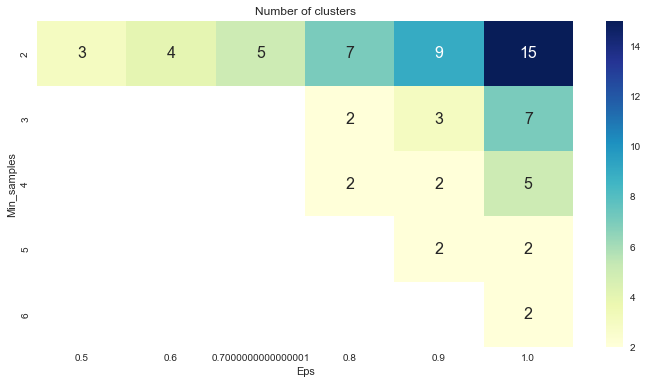

In [101]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

**--------Cluster K-Means ------------**

In [102]:
KM_clusters33 = KMeans(n_clusters=best_k, init='k-means++',random_state = 234).fit(df_33) # initialise and fit K-Means model

KM_clustered = Data.copy()
KM_clustered.loc[:,'cluster'] = KM_clusters33.labels_ 
KM_clustered = KM_clustered[['content','cluster']]
KM_clustered

,content,cluster
0,mahal promo promo semahal promo tarif mahal,7
1,urun,4
2,akun tangguh gapernah bikin order fiktif siste...,2
3,suka ay,0
4,mobil avanza bisnis,4
...,...,...
145,promo driver sibuk,7
146,oke,14
147,promo diskon the st,7
148,sngat bantu tpi gc normal harga slalu ubah ubah,9


In [103]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

KM_clustered['most_common_word'] = KM_clustered['content'].apply(most_common_word)
most_common_df = KM_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(10)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
most_common_word_1,suka,cepat,akun,alhamdulillah,urun,good,drever,promo,bantu,aplikasi,grabperjalan,pake,mantap,padalh,oke,grab,trimakasi,kode,good
most_common_word_2,suka,pesan,bagus,ayan,mobil,apl,ramah,sempurna,dpet,selesai,semoga,ksih,tip,NaN,app,bismillahirrahmanirrahim,NaN,akun,good
most_common_word_3,suka,mudah,aplikasi,puas,amsyong,update,jalan,tingkat,yg,aplikasi,nyaman,alhamdulillah,canada,NaN,ayan,banget,NaN,gabisa,grab
most_common_word_4,suka,cepat,apikasi,NaN,simple,gua,grab,kampret,aplikasi,imakasih,NaN,grab,indralaya,NaN,oke,selamat,NaN,apk,NaN
most_common_word_5,ay,mudah,order,NaN,download,update,emudi,driver,driver,bantu,NaN,NaN,NaN,NaN,oke,sahabat,NaN,aplikasi,NaN
most_common_word_6,NaN,cepat,order,NaN,sippppppppppppppp,gomawo,rmudah,lg,mantap,bantu,NaN,NaN,NaN,NaN,NaN,suka,NaN,akun,NaN
most_common_word_7,NaN,NaN,bagus,NaN,goood,lg,NaN,kalo,NaN,grab,NaN,NaN,NaN,NaN,NaN,semoga,NaN,NaN,NaN
most_common_word_8,NaN,NaN,iya,NaN,keren,update,NaN,batal,NaN,bantu,NaN,NaN,NaN,NaN,NaN,jengkel,NaN,NaN,NaN
most_common_word_9,NaN,NaN,bagus,NaN,baru,NaN,NaN,app,NaN,assalamualaikum,NaN,NaN,NaN,NaN,NaN,yess,NaN,NaN,NaN


**----------Cluster DBSCAN------------**

In [104]:
DBS_clustering33 = DBSCAN(eps=Eps, min_samples=Min_samples).fit(df_33)

DBSCAN_clustered = Data.copy()
DBSCAN_clustered.loc[:,'cluster'] = DBS_clustering33.labels_
DBSCAN_clustered = DBSCAN_clustered[['content','cluster']]
DBSCAN_clustered

,content,cluster
0,mahal promo promo semahal promo tarif mahal,0
1,urun,-1
2,akun tangguh gapernah bikin order fiktif siste...,-1
3,suka ay,1
4,mobil avanza bisnis,-1
...,...,...
145,promo driver sibuk,0
146,oke,3
147,promo diskon the st,11
148,sngat bantu tpi gc normal harga slalu ubah ubah,-1


In [105]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

DBSCAN_clustered['most_common_word'] = DBSCAN_clustered['content'].apply(most_common_word)
most_common_df = DBSCAN_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(11)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,-1,0,1,2,3,4,5,6,7,8,9,10,11,12,13
most_common_word_1,urun,promo,suka,bantu,aplikasi,suka,bantu,grab,good,download,drever,order,the,aplikasi,jalan
most_common_word_2,akun,driver,ay,bantu,cepat,suka,aplikasi,grab,update,memori,ramah,bagus,promo,mantap,emudi
most_common_word_3,mobil,driver,NaN,NaN,oke,like,NaN,NaN,update,NaN,driver,aplikasi,NaN,NaN,NaN
most_common_word_4,alhamdulillah,promo,NaN,NaN,app,NaN,NaN,NaN,gomawo,NaN,mudah,NaN,NaN,NaN,NaN
most_common_word_5,sempurna,NaN,NaN,NaN,simple,NaN,NaN,NaN,NaN,NaN,drever,NaN,NaN,NaN,NaN
most_common_word_6,grab,NaN,NaN,NaN,app,NaN,NaN,NaN,NaN,NaN,bagus,NaN,NaN,NaN,NaN
most_common_word_7,mantap,NaN,NaN,NaN,ayan,NaN,NaN,NaN,NaN,NaN,mudah,NaN,NaN,NaN,NaN
most_common_word_8,grabperjalan,NaN,NaN,NaN,oke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_9,good,NaN,NaN,NaN,tarif,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_10,pake,NaN,NaN,NaN,oke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**-----Comparing Performance------**

In [106]:
dbscan_silhouette_33 = silhouette_score(df_33, DBS_clustering33.labels_)
kmeans_silhouette_33 = silhouette_score(df_33, KM_clusters33.labels_)

print("DBSCAN Silhouette Score:", dbscan_silhouette_33)
print("K-Means Silhouette Score:", kmeans_silhouette_33)

DBSCAN Silhouette Score: 0.0023131323319807236
K-Means Silhouette Score: 0.01938808835669595


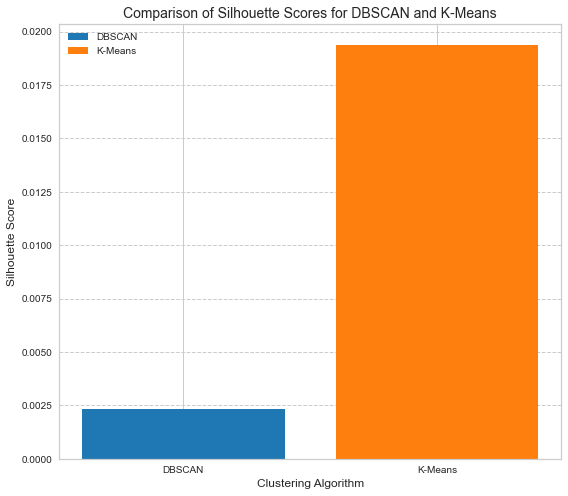

In [107]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.bar('DBSCAN', dbscan_silhouette_33, color='#1f77b4', label='DBSCAN')
ax.bar('K-Means', kmeans_silhouette_33, color='#ff7f0e', label='K-Means')

ax.set_xlabel('Clustering Algorithm', fontsize=12)
ax.set_ylabel('Silhouette Score', fontsize=12)
ax.set_title('Comparison of Silhouette Scores for DBSCAN and K-Means', fontsize=14)

ax.grid(axis='y', linestyle='--')


ax.legend(loc='upper left')

plt.show()

## **2.4 Clustering 2.4**

In [108]:
Data = pd.read_csv('Data34.csv')
Data

,content,sentiment
0,tambah sini tambah mahal promo percuma aja dul...,-1
1,agak urun,1
2,akun tiba tangguh padahal gapernah bikin order...,-1
3,suka ay,1
4,mobil avanza bisnis,1
...,...,...
145,promo guna sibuk terus,-1
146,oke,1
147,banyak promo diskon the st,1
148,sngat bantu tpi ko gc normal harga slalu ubah ...,1


In [109]:
Data = Data.dropna(subset=['content'])

counter = CountVectorizer()

X = counter.fit_transform(Data['content'])
vector = pd.DataFrame(X.toarray(), columns = counter.get_feature_names())
vector.set_index(Data.index,inplace =True)
    
vectorizer = TfidfTransformer()
Y = vectorizer.fit_transform(X)
df_tfidf = pd.DataFrame(Y.toarray(), columns = counter.get_feature_names())
df_tfidf.set_index(Data.index,inplace =True)
df_tfidf

,aaplikasi,ada,adminknp,aduh,agak,aj,aja,akhir,aktifitas,aktivitas,...,utk,verifikasi,verivikasi,vermuk,waktu,weeeewww,yaa,yam,yang,yess
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.345749,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.637711,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


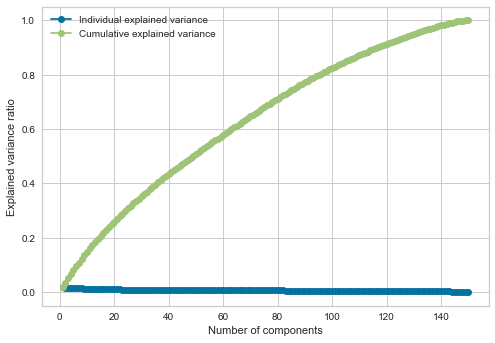

The optimal number of components is 130 with an explained variance ratio of 0.951.


In [110]:
pca = PCA()
pca.fit(df_tfidf)

var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.plot(range(1, len(var_exp)+1), var_exp, '-o', label='Individual explained variance')
plt.plot(range(1, len(cum_var_exp)+1), cum_var_exp, '-o', label='Cumulative explained variance')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.legend(loc='best')
plt.show()

for n, exp_var in enumerate(cum_var_exp):
    if exp_var >= 0.95:
        print(f'The optimal number of components is {n+1} with an explained variance ratio of {exp_var:.3f}.')
        break
        
pca = PCA(n_components=n)
df_pca = pca.fit_transform(df_tfidf)

df_pca = pd.DataFrame(df_pca, columns=['PC{}'.format(i) for i in range(1, n+1)])

if 'target' in df_tfidf.columns:
    df_pca['target'] = df_tfidf['target']

In [111]:
df_34 = df_pca

**-----K-Means-------**

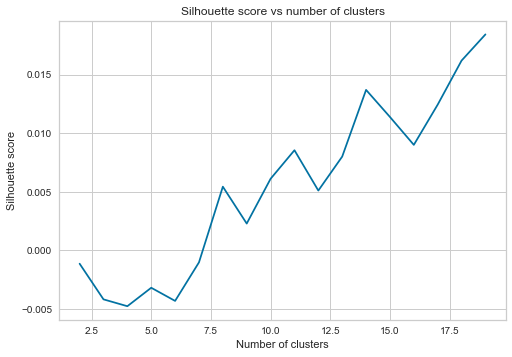

In [112]:
k_values = k_range

silhouette_scores = []
num_clusters = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df_34)
    labels = kmeans.labels_
    
    score = silhouette_score(df_34, labels)
    silhouette_scores.append(score)
    num_clusters.append(k)

plt.plot(num_clusters, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs number of clusters')
plt.show()

best_k = num_clusters[np.argmax(silhouette_scores)]


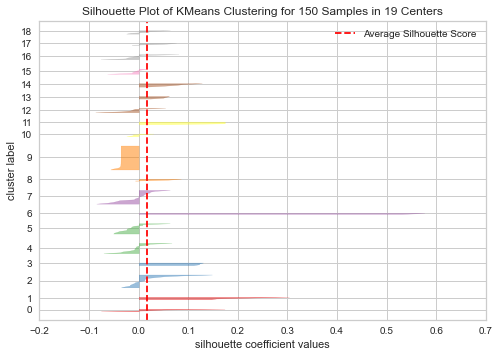

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 19 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [113]:
model = SilhouetteVisualizer(KMeans(best_k))
model.fit(df_34)
model.poof()  
model.show()

**----------DBSCAN----------**

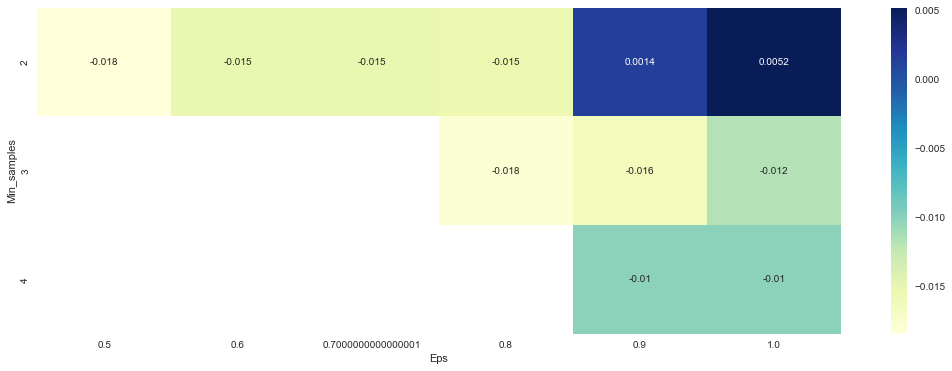

In [114]:
eps_values = epsilon
min_samples = samples

DBSCAN_params = list(product(eps_values, min_samples))

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(df_34)
    unique_labels = np.unique(DBS_clustering.labels_)
    if len(unique_labels) > 1:  
        no_of_clusters.append(len(unique_labels))
        sil_score.append(silhouette_score(df_34, DBS_clustering.labels_))
    else:
        no_of_clusters.append(np.nan)  
        sil_score.append(np.nan)  

tmp = pd.DataFrame.from_records(DBSCAN_params, columns=['Eps', 'Min_samples'])
tmp['No_of_clusters'] = no_of_clusters
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

In [115]:
tmp = tmp.sort_values(by = ['Sil_score'],ascending = False )
Eps = tmp['Eps'].iloc[0]
Min_samples = tmp['Min_samples'].iloc[0]

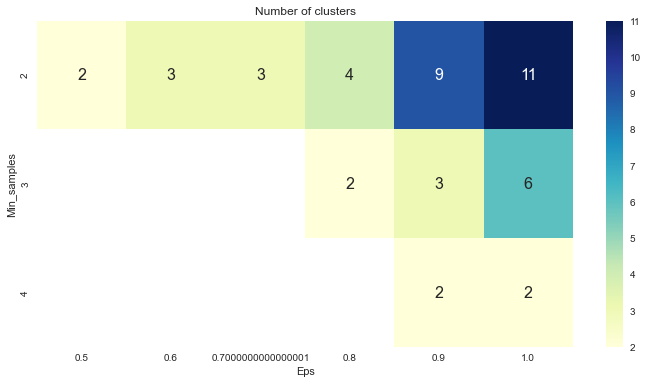

In [116]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

**--------Cluster K-Means ------------**

In [117]:
KM_clusters34 = KMeans(n_clusters=best_k, init='k-means++',random_state = 234).fit(df_34) # initialise and fit K-Means model

KM_clustered = Data.copy()
KM_clustered.loc[:,'cluster'] = KM_clusters34.labels_ 
KM_clustered = KM_clustered[['content','cluster']]
KM_clustered

,content,cluster
0,tambah sini tambah mahal promo percuma aja dul...,5
1,agak urun,14
2,akun tiba tangguh padahal gapernah bikin order...,2
3,suka ay,0
4,mobil avanza bisnis,14
...,...,...
145,promo guna sibuk terus,14
146,oke,10
147,banyak promo diskon the st,14
148,sngat bantu tpi ko gc normal harga slalu ubah ...,3


In [118]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

KM_clustered['most_common_word'] = KM_clustered['content'].apply(most_common_word)
most_common_df = KM_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(10)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
most_common_word_1,suka,imakasih,akun,dapat,udah,promo,gomawo,tingkat,good,buat,oke,makasi,kali,cepat,agak,bismillahirrahmanirrahim,sippppppppppppppp,akun,dengan
most_common_word_2,bagusgrab,pernah,kok,untuk,kenapa,sempurna,NaN,udah,good,driver,ayan,drever,good,app,mobil,semoga,NaN,apk,bagus
most_common_word_3,suka,mudah,bagus,kalau,kalo,lemotsering,NaN,tingkat,good,bs,oke,NaN,tolong,simple,ketika,selamat,NaN,akun,nyaman
most_common_word_4,suka,cepat,apikasi,untuk,kenapa,tambah,NaN,bagus,NaN,NaN,oke,NaN,batal,tarif,alhamdulillah,ada,NaN,suka,cukup
most_common_word_5,suka,mudah,order,dapat,lanjut,promo,NaN,NaN,NaN,NaN,NaN,NaN,update,sya,mantap,sahabat,NaN,NaN,emudi
most_common_word_6,ay,cepat,order,ubah,tolong,ada,NaN,NaN,NaN,NaN,NaN,NaN,gua,NaN,pake,semoga,NaN,NaN,NaN
most_common_word_7,suka,NaN,bagus,NaN,kenapa,canada,NaN,NaN,NaN,NaN,NaN,NaN,update,NaN,amsyong,jengkel,NaN,NaN,NaN
most_common_word_8,NaN,NaN,iya,NaN,gua,makin,NaN,NaN,NaN,NaN,NaN,NaN,lg,NaN,dpet,jalan,NaN,NaN,NaN
most_common_word_9,NaN,NaN,layan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alhamdulillah,NaN,luar,buat,NaN,NaN,NaN


**----------Cluster DBSCAN------------**

In [119]:
DBS_clustering34 = DBSCAN(eps=Eps, min_samples=Min_samples).fit(df_34)

DBSCAN_clustered = Data.copy()
DBSCAN_clustered.loc[:,'cluster'] = DBS_clustering34.labels_
DBSCAN_clustered = DBSCAN_clustered[['content','cluster']]
DBSCAN_clustered

,content,cluster
0,tambah sini tambah mahal promo percuma aja dul...,-1
1,agak urun,-1
2,akun tiba tangguh padahal gapernah bikin order...,-1
3,suka ay,0
4,mobil avanza bisnis,-1
...,...,...
145,promo guna sibuk terus,2
146,oke,1
147,banyak promo diskon the st,9
148,sngat bantu tpi ko gc normal harga slalu ubah ...,-1


In [120]:
def most_common_word(text):
    words = text.split()
    word_count = Counter(words)
    most_common_word = word_count.most_common(1)
    return most_common_word[0][0] if most_common_word else None

DBSCAN_clustered['most_common_word'] = DBSCAN_clustered['content'].apply(most_common_word)
most_common_df = DBSCAN_clustered.groupby('cluster')['most_common_word'].apply(list).reset_index()

result_df = pd.DataFrame(columns=['cluster'])
for index, row in most_common_df.iterrows():
    cluster = row['cluster']
    words = row['most_common_word']
    result_df.at[index, 'cluster'] = cluster
    for i, word in enumerate(words):
        result_df.at[index, f'most_common_word_{i+1}'] = word
result = result_df.T.head(11)
result.columns = result.iloc[0]
result = result [1:]
result

cluster,-1,0,1,2,3,4,5,6,7,8,9
most_common_word_1,promo,suka,oke,guna,imakasih,suka,udah,puas,driver,apk,the
most_common_word_2,agak,yang,ayan,baru,rasa,tambah,tingkat,cukup,mudah,suka,banyak
most_common_word_3,akun,ay,oke,promo,NaN,NaN,bagus,NaN,mudah,NaN,NaN
most_common_word_4,mobil,NaN,oke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_5,ketika,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_6,alhamdulillah,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_7,sempurna,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_8,bagusgrab,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_9,mantap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
most_common_word_10,dengan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**-----Comparing Performance------**

In [121]:
dbscan_silhouette_34 = silhouette_score(df_34, DBS_clustering34.labels_)
kmeans_silhouette_34 = silhouette_score(df_34, KM_clusters34.labels_)

print("DBSCAN Silhouette Score:", dbscan_silhouette_34)
print("K-Means Silhouette Score:", kmeans_silhouette_34)

DBSCAN Silhouette Score: 0.005201603125020816
K-Means Silhouette Score: 0.01696074242284613


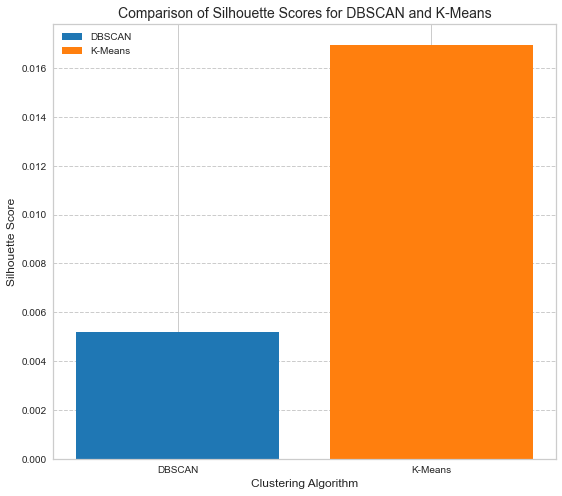

In [122]:
fig, ax = plt.subplots(figsize=(9, 8))

ax.bar('DBSCAN', dbscan_silhouette_34, color='#1f77b4', label='DBSCAN')
ax.bar('K-Means', kmeans_silhouette_34, color='#ff7f0e', label='K-Means')

ax.set_xlabel('Clustering Algorithm', fontsize=12)
ax.set_ylabel('Silhouette Score', fontsize=12)
ax.set_title('Comparison of Silhouette Scores for DBSCAN and K-Means', fontsize=14)

ax.grid(axis='y', linestyle='--')


ax.legend(loc='upper left')

plt.show()

# **4. Conclusion**

## **4.1 Conclusion by the Perfomance**

In [123]:
var_names = [
    'kmeans_silhouette_21',
    'kmeans_silhouette_22',
    'kmeans_silhouette_23',
    'kmeans_silhouette_24',
    'dbscan_silhouette_21',
    'dbscan_silhouette_22',
    'dbscan_silhouette_23',
    'dbscan_silhouette_24',
    'kmeans_silhouette_31',
    'kmeans_silhouette_32',
    'kmeans_silhouette_33',
    'kmeans_silhouette_34',
    'dbscan_silhouette_31',
    'dbscan_silhouette_32',
    'dbscan_silhouette_33',
    'dbscan_silhouette_34'
]

df = pd.DataFrame(columns=['variable_name', 'silhouette_score'])

for var_name in var_names:
    score = globals()[var_name]  
    df = df.append({'variable_name': var_name, 'silhouette_score': score}, ignore_index=True)
df

,variable_name,silhouette_score
0,kmeans_silhouette_21,0.01691
1,kmeans_silhouette_22,0.004337
2,kmeans_silhouette_23,0.01269
3,kmeans_silhouette_24,-0.005954
4,dbscan_silhouette_21,0.005237
5,dbscan_silhouette_22,0.016465
6,dbscan_silhouette_23,-0.007467
7,dbscan_silhouette_24,0.016602
8,kmeans_silhouette_31,0.01971
9,kmeans_silhouette_32,0.011998


In [124]:
df_con = pd.DataFrame({
    'method': ['kmeans', 'kmeans', 'kmeans', 'kmeans',
               'dbscan', 'dbscan', 'dbscan', 'dbscan',
               'kmeans', 'kmeans', 'kmeans', 'kmeans',
               'dbscan', 'dbscan', 'dbscan', 'dbscan'],  
    'Sampling': ['Balanced', 'Balanced', 'Balanced', 'Balanced',
               'Balanced', 'Balanced', 'Balanced', 'Balanced',
               'UnBalanced', 'UnBalanced', 'UnBalanced', 'UnBalanced',
               'UnBalanced', 'UnBalanced', 'UnBalanced', 'UnBalanced'],
    'Preproces Method': ['NA & Classic', 'NA & Zipfs', 'Porter & Classic', 'Porter & Zipfs',
                         'NA & Classic', 'NA & Zipfs', 'Porter & Classic', 'Porter & Zipfs',
                         'NA & Classic', 'NA & Zipfs', 'Porter & Classic', 'Porter & Zipfs',
                         'NA & Classic', 'NA & Zipfs', 'Porter & Classic', 'Porter & Zipfs'],
    'variable_name': ['kmeans_silhouette_21', 'kmeans_silhouette_22', 'kmeans_silhouette_23', 'kmeans_silhouette_24',
                      'dbscan_silhouette_21', 'dbscan_silhouette_22', 'dbscan_silhouette_23', 'dbscan_silhouette_24',
                      'kmeans_silhouette_31', 'kmeans_silhouette_32', 'kmeans_silhouette_33', 'kmeans_silhouette_34',
                      'dbscan_silhouette_31', 'dbscan_silhouette_32', 'dbscan_silhouette_33', 'dbscan_silhouette_34'],
    'silhouette_score': [kmeans_silhouette_21, kmeans_silhouette_22, kmeans_silhouette_23, kmeans_silhouette_24,
                      dbscan_silhouette_21, dbscan_silhouette_22, dbscan_silhouette_23, dbscan_silhouette_24,
                      kmeans_silhouette_31, kmeans_silhouette_32, kmeans_silhouette_33, kmeans_silhouette_34,
                      dbscan_silhouette_31, dbscan_silhouette_32, dbscan_silhouette_33, dbscan_silhouette_34]
})

df_con

,method,Sampling,Preproces Method,variable_name,silhouette_score
0,kmeans,Balanced,NA & Classic,kmeans_silhouette_21,0.016910
1,kmeans,Balanced,NA & Zipfs,kmeans_silhouette_22,0.004337
2,kmeans,Balanced,Porter & Classic,kmeans_silhouette_23,0.012690
3,kmeans,Balanced,Porter & Zipfs,kmeans_silhouette_24,-0.005954
4,dbscan,Balanced,NA & Classic,dbscan_silhouette_21,0.005237
5,dbscan,Balanced,NA & Zipfs,dbscan_silhouette_22,0.016465
6,dbscan,Balanced,Porter & Classic,dbscan_silhouette_23,-0.007467
7,dbscan,Balanced,Porter & Zipfs,dbscan_silhouette_24,0.016602
8,kmeans,UnBalanced,NA & Classic,kmeans_silhouette_31,0.019710
9,kmeans,UnBalanced,NA & Zipfs,kmeans_silhouette_32,0.011998


In [125]:
pivot_ui(df_con)

## **4.2 Conclusion by the Result**

In [126]:
KM_clusters21
KM_clusters22
KM_clusters23
KM_clusters24

KM_clusters31
KM_clusters32
KM_clusters33
KM_clusters34

KMeans(n_clusters=19, random_state=234)

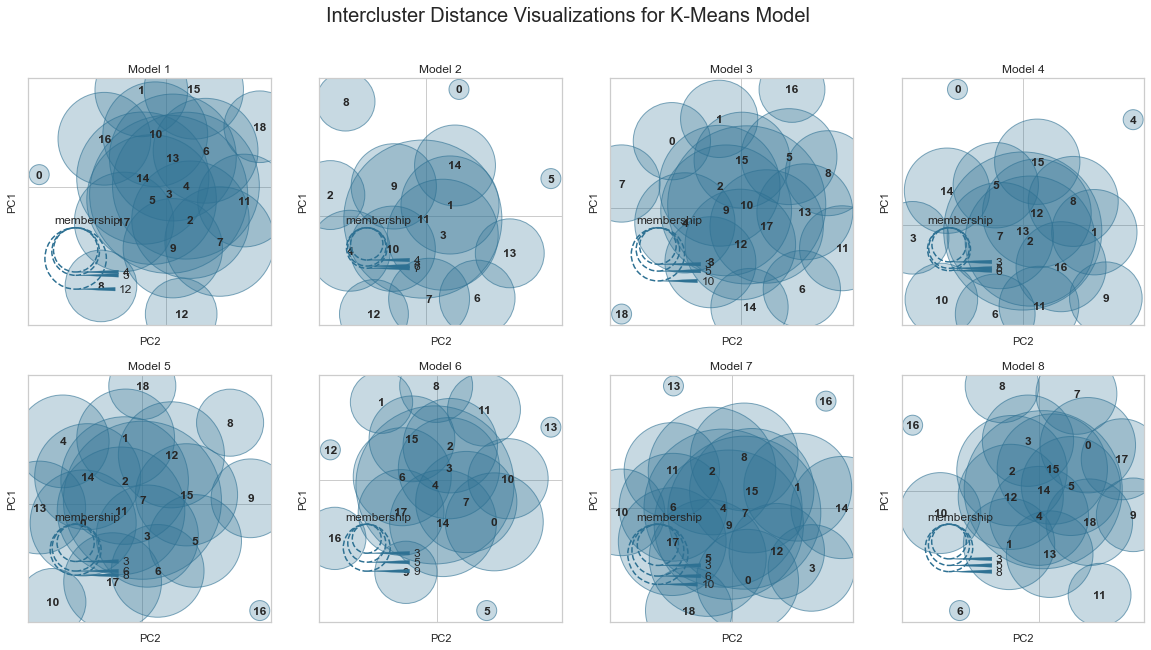

In [127]:
dfs = [df_21, df_22, df_23, df_24, df_31, df_32, df_33, df_34]
clusters = [KM_clusters21, KM_clusters22, KM_clusters23, KM_clusters24, KM_clusters31, KM_clusters32, KM_clusters33, KM_clusters34]

# Create a 2x4 grid of subplots
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

# Loop over the subplots and create the visualizations
for i, ax in enumerate(axs.flatten()):
    if i < len(dfs):
        visualizer = InterclusterDistance(clusters[i], ax=ax)
        visualizer.fit(dfs[i])
        visualizer.finalize()
        ax.set_title("Model {}".format(i+1))

# Add a title and show the plot
fig.suptitle("Intercluster Distance Visualizations for K-Means Model", fontsize=20)
plt.show()

In [128]:
result21 = DBS_clustering21.fit_predict(df_21)
result22 = DBS_clustering22.fit_predict(df_22)
result23 = DBS_clustering23.fit_predict(df_23)
result24 = DBS_clustering24.fit_predict(df_24)

result31 = DBS_clustering31.fit_predict(df_31)
result32 = DBS_clustering32.fit_predict(df_32)
result33 = DBS_clustering33.fit_predict(df_33)
result34 = DBS_clustering34.fit_predict(df_34)

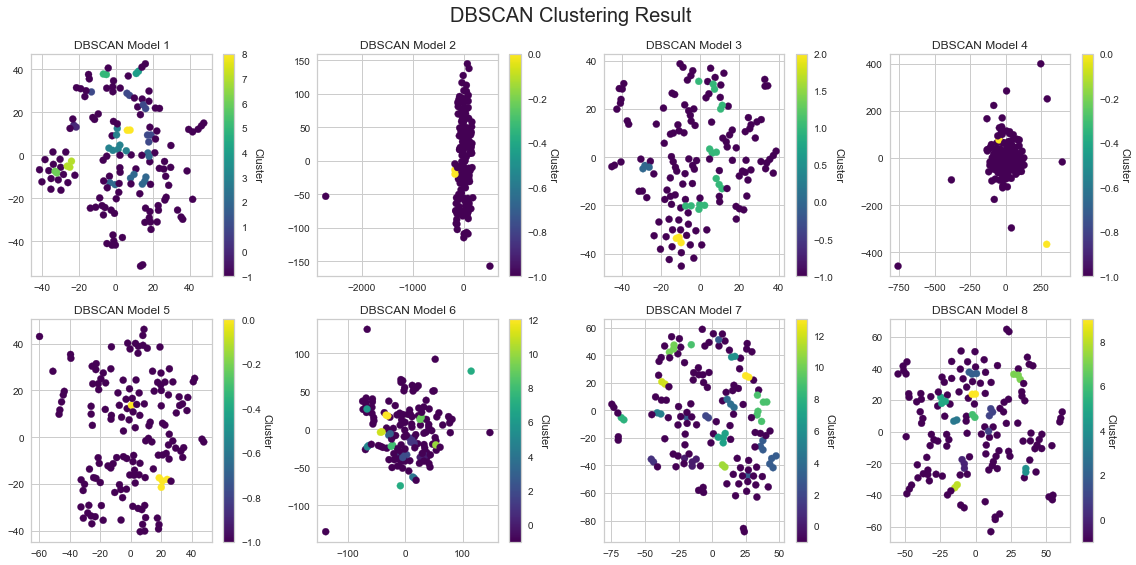

In [129]:
results = [result21, result22, result23, result24, result31, result32, result33, result34]

dfs = [df_21, df_22, df_23, df_24, df_31, df_32, df_33, df_34]

tsne = TSNE(n_components=2, perplexity=5, random_state=42)

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16,8))

for i, (result, df) in enumerate(zip(results, dfs)):
    reduced_data = tsne.fit_transform(df)
    
    axes[i//4, i%4].scatter(reduced_data[:, 0], reduced_data[:, 1], c=result, cmap='viridis')
    axes[i//4, i%4].set_title(f"DBSCAN Model {i+1}")
    
for ax in axes.flat:
    cbar = plt.colorbar(ax.collections[0], ax=ax)
    cbar.ax.set_ylabel('Cluster', rotation=270, labelpad=10)

fig.suptitle("DBSCAN Clustering Result", fontsize=20)
plt.tight_layout()
plt.show()